# Creación del dataset ompm


Antes de nada necesitamos cargar las librerías pandas, matplotlib,networkx y el paquete nilmtk.

Asimismo realizaremos algunos otros ajustes.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import rcParams
from nilmtk.utils import print_dict
from nilmtk import DataSet,TimeFrame
import warnings
from IPython.display import SVG
warnings. filterwarnings("ignore")
plt.style.use('bmh')


from nilmtk import TimeFrame, MeterGroup, HDFDataStore, DataSet

from nilmtk.metrics import fraction_energy_assigned_correctly, mean_normalized_error_power
from nilmtk.metrics import rms_error_power, f1_score, error_in_assigned_energy

from nilmtk.utils import print_dict

labels = ['Main', 'Fryer', 'LED Lamp',  'Incandescent lamp','Laptop Computer', 'Fan']
colors=['tab:blue','tab:orange','tab:green','tab:olive','tab:purple','tab:cyan','tab:grey']

data_dir='./data/'

## Creación del fichero en formato  HDFS5 a partir de las medidas y los metadatos 

La primera tarea es la conversion de los diferentes ficheros de medidas en formato csv al formato HDFS5  (o simplificando H5), que almacenaramos en la carpeta `./data`. Además en el archivo h5, que va contener los datos recopilados,  tambien tendremos todos  los metadatos del dataset.

El timestamp arrojado por el oZM esta en  en formato 13 digitos (es decir almacena hasta los milisegundos pasados desde el 1 del 1 de 1970).El Timestamp en "timezone" para Almeria es "Europe/Madrid" https://www.epochconverter.com/

El resto de metadatos tienen que ver con la potencia (real,reactiva y aparente), el voltaje, la intensidad,la frecuencia y el factor de potencia.

Para cada fichero csv, que numeraremos del 1 al 7 corresponditntes a cada medidor (siendo el nº 1 el principal),en la clase convert_ualm,  seguimos los siguintes pasos:

- Lectura del fichero numeado

- Conversión a formato fecha del campo timestamp

- Carga del resto de columnas

- Sort index

- Resample

- Reindexacion del fichero

Obviamente la clase  lanza este proceso para todos los ficheros de datos localizados en la carpeta de entrada \electricity\  usando  el fichero labels.csv

El contenido del fichero labels.csv es el siguinte:

- 1 mains

- 2 fan

- 3 computer laptop

- 4 incandescent light 

- 5 LED light

- 6 television



Por ultimo, asociamos los metadatos correspondientes ,leyendo los ficheros de la ruta C:\Users\XXXXX\anaconda3\envs\nilmtk-env\Lib\site-packages\nilmtk\dataset_converters\ualm\metadata. 


Los ficheros que usaremos como metadatos para incorporarlos al fichero H5 son los siguintes:

 - builiding1.yaml
 
 - dataset.yaml
 
 - meter_devices.yaml



In [2]:
from nilmtk.dataset_converters import convert_ualm2
convert_ualm2('./data/ozm2/', 'ualm2.h5','2023-05-17','2023-05-17')

Path ualm: ./data/ozm2/ /electricity

***********************************************************************************************
..Loading file    1 .csv
..Reading file csv
          timestamp    VLN    A    W     f   PF
0      1.684309e+12  241.5  0.0  0.0  50.0  0.0
1      1.684309e+12  241.6  0.0  0.0  49.9  0.0
2      1.684309e+12  241.6  0.0  0.0  49.9  0.0
3      1.684309e+12  241.6  0.0  0.0  49.9  0.0
4      1.684309e+12  241.6  0.0  0.0  49.9  0.0
...             ...    ...  ...  ...   ...  ...
36041  1.684341e+12  236.9  0.0  0.0  49.9  0.0
36042  1.684341e+12  236.9  0.0  0.0  49.9  0.0
36043  1.684341e+12  236.9  0.0  0.0  50.0  0.0
36044  1.684341e+12  236.8  0.0  0.0  49.9  0.0
36045  1.684341e+12  236.8  0.0  0.0  49.9  0.0

[36046 rows x 6 columns]
Conversion of timestamp
                                    VLN    A    W     f   PF
2023-05-17 09:34:03.472000+02:00  241.5  0.0  0.0  50.0  0.0
2023-05-17 09:34:04.264000+02:00  241.6  0.0  0.0  49.9  0.0
2023-05-17 09

          timestamp    VLN    A    W     f   PF
0      1.684309e+12  241.7  0.0  0.0  49.9  0.0
1      1.684309e+12  241.8  0.0  0.0  49.9  0.0
2      1.684309e+12  241.8  0.0  0.0  50.0  0.0
3      1.684309e+12  241.8  0.0  0.0  50.0  0.0
4      1.684309e+12  241.7  0.0  0.0  49.9  0.0
...             ...    ...  ...  ...   ...  ...
36041  1.684341e+12  237.1  0.0  0.0  50.0  0.0
36042  1.684341e+12  237.1  0.0  0.0  49.9  0.0
36043  1.684341e+12  237.1  0.0  0.0  50.0  0.0
36044  1.684341e+12  236.8  0.0  0.0  49.9  0.0
36045  1.684341e+12  236.6  0.0  0.0  49.9  0.0

[36046 rows x 6 columns]
Conversion of timestamp
                                    VLN    A    W     f   PF
2023-05-17 09:34:03.472000+02:00  241.7  0.0  0.0  49.9  0.0
2023-05-17 09:34:04.264000+02:00  241.8  0.0  0.0  49.9  0.0
2023-05-17 09:34:05.076000+02:00  241.8  0.0  0.0  50.0  0.0
2023-05-17 09:34:05.883000+02:00  241.8  0.0  0.0  50.0  0.0
2023-05-17 09:34:06.704000+02:00  241.7  0.0  0.0  49.9  0.0
...     

Done converting YAML metadata to HDF5!
Successfully performed the conversion of ualM to HDF5 format! 


Convertidos los metdatos y los datos a HDFS5, la primera tarea es la importación del dataset que se encuentra en formato HDF5 en la carpeta `./data`. Para ello, se carga el archivo dsual.h5 que contiene los datos recopilados y metadatos del dataset.

In [3]:
#dataset de referencia 
ompm = DataSet('ualm2.h5')


## MeterGroup y ElecMeter

Todos los conjuntos de datos de NILM constan de varios grupos de medidores de electricidad. 

Podemos agrupar los contadores por los siguintes criterios:
- Por viviendas en caso de haber mas viviendas por contador principal
- Por el tipo de aparato al que están conectados directamente
- Por frecuencia de muestreo
- O si el medidor es un "medidor de sitio" para toda la casa
- Si es un submedidor, a nivel de electrodomésticos, o incluso a nivel de circuito.

En NILMTK, una de las clases clave es MeterGroup, que almacena una lista de medidores y nos permite seleccionar un subconjunto de medidores, agregar energía de todos los medidores y muchas otras funciones.

Cuando abrimos por primera vez un DataSet, NILMTK crea varios objetosMeterGroup. Hay una clase llamada nilmtk.global_meter_group, la cual contiene todos los medidores cargados actualmente (incluso de varios conjuntos de datos si ha abierto más de un conjunto de datos). 

También hay un MeterGroup por edificio (que vive en el atributoBuilding.elec). También podemos anidar "MeterGroups" para agregar redes de fase dividida, red trifásica y aparatos de suministro dual (240 voltios) en conjuntos de datos de América del Norte y Canadá. 

En este punto, todos los metadatos se han cargado en la memoria pero ninguno de los datos de energía se ha cargado.
Cada edificio tiene un atributo "elec" que es un objeto "MeterGroup"y  que contiene los medidores "ElecMeter".

In [4]:
elec = ompm.buildings[1].elec #todos los medidores del dataset
elec

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='fryer', instance=1)])
  ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='LED lamp', instance=1)])
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='incandescent lamp', instance=1)])
  ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='laptop computer', instance=1)])
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
)

Tenga en cuenta que podria haber grupos de medidores anidados: por ejemplo para un horno électrico y otro para la lavadora secadora (ambos son electrodomésticos de 240 voltios podrian tener dos medidores por electrodoméstico):

In [5]:
elec.nested_metergroups()

[]

Poner estos medidores en un grupo de medidores nos permite sumar fácilmente la demanda de energía registrada por ambos medidores para obtener la demanda de energía total para todo el aparato (pero también es muy fácil ver la demanda de energía del medidor individual).

Podemos obtener fácilmente un grupo de medidores(MeterGroup) de los submedidores o de la red.

In [6]:
elec.mains()

ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[])

Podemos obtener fácilmente la suma de los datos de potencia de ambos medidores de red:

In [7]:
elec.mains().power_series_all_data()

2023-05-17 09:34:03.472000+02:00    0.0
2023-05-17 09:34:04.264000+02:00    0.0
2023-05-17 09:34:05.076000+02:00    0.0
2023-05-17 09:34:05.883000+02:00    0.0
2023-05-17 09:34:06.704000+02:00    0.0
                                   ... 
2023-05-17 18:37:23.379000+02:00    0.0
2023-05-17 18:37:24.295000+02:00    0.0
2023-05-17 18:37:25.217000+02:00    0.0
2023-05-17 18:37:26.134000+02:00    0.0
2023-05-17 18:37:27.061000+02:00    0.0
Name: (power, active), Length: 36046, dtype: float32

Obtenemos los submedidores asociados al medidor principal

In [8]:
elec.submeters()

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='fryer', instance=1)])
  ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='LED lamp', instance=1)])
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='incandescent lamp', instance=1)])
  ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='laptop computer', instance=1)])
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
)

### Etiquetas de dispositivos

In [9]:
labels = pd.DataFrame({'Instances': list(range(1,7)),
                       'Meters': ['Main', 'Fryer', 'LED Lamp',  'Incandescent lamp','Laptop Computer', 'Fan']})

Meters={}
for x in range(len(labels)): Meters[elec[x+1]]=labels['Meters'][x]   

##  Metadatos

Mediante el metodo print_dict podemos explorar los metadatos asociados al Dataset

In [10]:
print_dict(ompm.metadata)  #metadatos del dataset

Asimismo podemos explorando los metadatos asociados al edificio

In [11]:
print_dict(ompm.buildings[1].metadata) #Información del edificio 1 (instancia 1)

Veamos los metadados asociados a los sinte  aparatos de medida

In [12]:
print_dict(elec[1].get_metadata()) #metadatos de ElecMeter 1 o elec[1]

print_dict(elec[2].get_metadata()) #metadatos de ElecMeter 2 o elec[2]

print_dict(elec[3].get_metadata()) #metadatos de ElecMeter 3 o elec[3]

print_dict(elec[4].get_metadata()) #metadatos de ElecMeter 4 o elec[4]

print_dict(elec[5].get_metadata()) #metadatos de ElecMeter 5 o elec[5]

print_dict(elec[6].get_metadata()) #metadatos de ElecMeter 6 o elec[6]

# Estadísticas e información para medidores individuales

La clase 'ElecMeter' representa un solo medidor de electricidad. Cada ElecMeter tiene una lista de objetos de dispositivo asociados. Cada medidor puede estar asociado a uno o más electrodomésticos.ElecMeter tiene muchos de los mismos métodos de estadísticas que MeterGroup, como 'total_energy' , 'available_power_ac_types' , 'power_series', 'power_series_all_data'. 

Ahora exploraremos algunas funciones de estadísticas más (muchas de las cuales también están disponibles en MeterGroup) .

Vamos a  estudiar el medidor asociado al hervidor de agua:

In [13]:
fan_meter = elec['fan']

Obtener el  medidor principal  superior o "de aguas arriba" (upstream meter)

In [14]:
fan_meter.upstream_meter() # happens to be the mains meter group!

ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[])

Metadatos sobre la clase de medidor

In [15]:
fan_meter.device

{'model': 'OZM',
 'manufacturer': 'ual',
 'manufacturer_url': 'https://openzmeter.com/',
 'description': 'Multifunction meter for feeders',
 'sample_period': 60,
 'max_sample_period': 300,
 'measurements': [{'physical_quantity': 'power',
   'type': 'active',
   'upper_limit': 10000,
   'lower_limit': 0},
  {'physical_quantity': 'frequency',
   'type': None,
   'upper_limit': 70,
   'lower_limit': 0},
  {'physical_quantity': 'voltage',
   'type': None,
   'upper_limit': 270,
   'lower_limit': 0},
  {'physical_quantity': 'pf',
   'type': None,
   'upper_limit': 1,
   'lower_limit': 0},
  {'physical_quantity': 'current',
   'type': None,
   'upper_limit': 100,
   'lower_limit': 0}]}

Aparato dominante:Si los metadatos especifican que un medidor tiene varios medidores conectados, entonces uno de ellos se puede especificar como el dispositivo 'dominante', y este dispositivo se puede recuperar con este método

In [16]:
fan_meter.dominant_appliance()

Appliance(type='fan', instance=1)

### Energia total

Algunos métodos estadísticos de MeterGroup permanecen en ElecMeter:

In [17]:
fan_meter.total_energy() # kWh

active    0.221341
dtype: float64

Podemos optar por volcar todos los datos sobre el medidor de luminarias:

In [18]:
next(fan_meter.load())

physical_quantity,current,frequency,power,voltage,pf
type,,,active,,
2023-05-17 09:34:04.264000+02:00,0.0,49.900002,0.0,242.100006,0.0
2023-05-17 09:34:05.076000+02:00,0.0,49.900002,0.0,242.100006,0.0
2023-05-17 09:34:05.883000+02:00,0.0,49.900002,0.0,242.100006,0.0
2023-05-17 09:34:06.704000+02:00,0.0,50.000000,0.0,242.100006,0.0
2023-05-17 09:34:07.533000+02:00,0.0,49.900002,0.0,241.899994,0.0
...,...,...,...,...,...
2023-05-17 18:37:23.379000+02:00,0.0,50.000000,0.0,237.399994,0.0
2023-05-17 18:37:24.295000+02:00,0.0,49.900002,0.0,237.500000,0.0
2023-05-17 18:37:25.217000+02:00,0.0,50.000000,0.0,237.399994,0.0


O cargar un generador que nos dará los valores en chunks. Más eficiente.

In [19]:
next (fan_meter.power_series())

2023-05-17 09:34:04.264000+02:00    0.0
2023-05-17 09:34:05.076000+02:00    0.0
2023-05-17 09:34:05.883000+02:00    0.0
2023-05-17 09:34:06.704000+02:00    0.0
2023-05-17 09:34:07.533000+02:00    0.0
                                   ... 
2023-05-17 18:37:23.379000+02:00    0.0
2023-05-17 18:37:24.295000+02:00    0.0
2023-05-17 18:37:25.217000+02:00    0.0
2023-05-17 18:37:26.134000+02:00    0.0
2023-05-17 18:37:27.061000+02:00    0.0
Name: (power, active), Length: 35977, dtype: float32

### Obtener buenas secciones

Si graficamos los datos de potencia sin procesar, vemos que hay una gran brecha donde, supuestamente, el sistema de medición no estaba funcionando. (si tuviéramos que acercarnos, también veríamos muchos espacios más pequeños) con light_meter.plot.Podemos identificar automáticamente las 'secciones buenas' (es decir, las secciones donde cada par de muestras consecutivas es menor que 'max_sample_period` especificado en los metadatos del conjunto de datos):

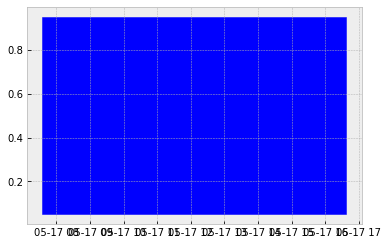

In [20]:
good_sections = fan_meter.good_sections(full_results=True)
good_sections.plot()

Los fragmentos azules muestran dónde son buenos los datos. Una brecha blanca seria en datos incompletos en los datos de potencia bruta. Teoriacamente podria habermuchos huecos más pequeños que no podemos ver en este nivel de zoom.

También podemos ver las secciones exactas identificadas:

In [21]:
good_sections.combined()

[TimeFrame(start='2023-05-17 09:34:04.264000+02:00', end='2023-05-17 18:37:27.061000+02:00', empty=False)]

## Dropout rate (tasa de deserción )

Además de que puede aparecer grandes lagunas debido a que todo el sistema está inactivo, también podemo teners pequeñas lagunas frecuentes debido a que algunos sensores  arrojan datos. A esto a veces se le llama "abandono". La tasa de abandono es un número entre 0 y 1 que especifica la proporción de muestras que faltan. Una tasa de abandono de 0 significa que no faltan muestras. Un valor de 1 significaría que faltan todas las muestras:

In [22]:
fan_meter.dropout_rate()

0.0

## Seleccion de subgrupos de medidores

Usamos ElecMeter.select_using_appliances () para seleccionar un nuevo MeterGroup usando un campo de metadatos. Por ejemplo, para obtener todas los ventiladore del conjunto de datos DSUALM::

In [23]:
import nilmtk
nilmtk.global_meter_group.select_using_appliances(type='fan')

MeterGroup(meters=
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
)

O seleccione varios tipos de aparatos:

In [24]:
elec.select_using_appliances(type=['fryer', 'fan'])

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='fryer', instance=1)])
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
)

O todos los electrodomésticos del edificio 1 con motor de inducción monofásico (!):

In [25]:
nilmtk.global_meter_group.select_using_appliances(building=1, category='single-phase induction motor')

MeterGroup(meters=
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
)

(NILMTK importa los 'metadatos comunes' del proyecto de metadatos NILM, que incluye una amplia gama de taxonomías de diferentes categorías)(http://nilm-metadata.readthedocs.org/en/latest/central_metadata.html#appliancetype))

## Medidas disponibles para cada medidor exceptuando la potencia

In [26]:
elec.available_physical_quantities() #todas las medidas del MeterGroup

['voltage', 'frequency', 'power', 'pf', 'current']

In [27]:
elec[1].available_physical_quantities() #medidas de ElecMeter 1 (mains)



['voltage', 'frequency', 'power', 'pf', 'current']

In [28]:
elec[2].available_physical_quantities() #medidas de ElecMeter 2 (boiler)


['voltage', 'frequency', 'power', 'pf', 'current']

In [29]:
elec[3].available_physical_quantities() #medidas de ElecMeter 3 (fan)


['voltage', 'frequency', 'power', 'pf', 'current']

In [30]:
elec[4].available_physical_quantities() #medidas de ElecMeter 4 (freezer)


['voltage', 'frequency', 'power', 'pf', 'current']

In [31]:
elec[5].available_physical_quantities() #medidas de ElecMeter 5 (television)


['voltage', 'frequency', 'power', 'pf', 'current']

In [32]:
elec[6].available_physical_quantities() #medidas de ElecMeter 6 (vacuum cleaner)


['voltage', 'frequency', 'power', 'pf', 'current']

## Medidas disponibles relativas a la potencia


In [33]:
elec[1].available_ac_types('power') #medidas de potencia de ElecMeter 1 

['active']

In [34]:
elec[2].available_ac_types('power') #medidas de potencia de ElecMeter 2

['active']

In [35]:
elec[3].available_ac_types('power') #medidas de potencia de ElecMeter 3

['active']

In [36]:
elec[4].available_ac_types('power') #medidas de potencia de ElecMeter 4

['active']

In [37]:
elec[5].available_ac_types('power') #medidas de potencia de ElecMeter 5

['active']

In [38]:
elec[6].available_ac_types('power') #medidas de potencia de ElecMeter 6

['active']

Del atributo 'elec' se puede obtener información de los medidores

En caso de consultar por una medición en específico, se pueden usar los siguientes tipos de mediciones tanto en ‘available_physical_quantities’ como en ‘available_ac_types’: 'power', 'energy', 'cumulative energy', 'voltage', 'current', 'pf', 'frequency', 'power factor', 'state', 'phase angle'.

### Medidas disponibles por electrodomestico o aparato

Podemos  ver las medidas desde otro punto de vista

Veamos qué medidas tenemos para el frigorífico,hervidor,luz,tv,etc:

In [39]:
fan = elec['fan']
fan.available_columns()

[('current', None),
 ('frequency', None),
 ('power', 'active'),
 ('voltage', None),
 ('pf', None)]

In [40]:
laptop = elec['laptop computer']
laptop.available_columns()

[('current', None),
 ('frequency', None),
 ('power', 'active'),
 ('voltage', None),
 ('pf', None)]

In [41]:
lamp = elec['incandescent lamp']
lamp.available_columns()

[('current', None),
 ('frequency', None),
 ('power', 'active'),
 ('voltage', None),
 ('pf', None)]

In [42]:
LED = elec['LED lamp']
LED.available_columns()

[('current', None),
 ('frequency', None),
 ('power', 'active'),
 ('voltage', None),
 ('pf', None)]

In [43]:
fryer = elec['fryer']
fryer.available_columns()

[('current', None),
 ('frequency', None),
 ('power', 'active'),
 ('voltage', None),
 ('pf', None)]

## Resumen de mediciones

Ahora veamos un resumen de las medidas disponibles por cada medidor

In [44]:
print('Mediciones disponibles - Dataset: '+str(elec.available_physical_quantities()))
print('Mediciones de Potencia disponibles - Dataset: '+str(elec.available_ac_types('power')))

print('\nMedidas disponibles por cada medidor:')
for x in range(len(labels)):
    print(str(labels['Meters'][x])+': '+str(elec[x+1].available_physical_quantities()))

print('\nMedidas de potencia por cada medidor:')  
for x in range(len(labels)):
    print(str(labels['Meters'][x])+': '+str(elec[x+1].available_ac_types('power')))

Mediciones disponibles - Dataset: ['voltage', 'frequency', 'power', 'pf', 'current']
Mediciones de Potencia disponibles - Dataset: ['active']

Medidas disponibles por cada medidor:
Main: ['voltage', 'frequency', 'power', 'pf', 'current']
Fryer: ['voltage', 'frequency', 'power', 'pf', 'current']
LED Lamp: ['voltage', 'frequency', 'power', 'pf', 'current']
Incandescent lamp: ['voltage', 'frequency', 'power', 'pf', 'current']
Laptop Computer: ['voltage', 'frequency', 'power', 'pf', 'current']
Fan: ['voltage', 'frequency', 'power', 'pf', 'current']

Medidas de potencia por cada medidor:
Main: ['active']
Fryer: ['active']
LED Lamp: ['active']
Incandescent lamp: ['active']
Laptop Computer: ['active']
Fan: ['active']


Los dispositivos se identifican de forma única dentro de un edificio por un tipo (luces, televisión, etc.) y un número de instancia. Si no se especifica un número de instancia, ElecMeter recupera la instancia 1.

### Esquema de red

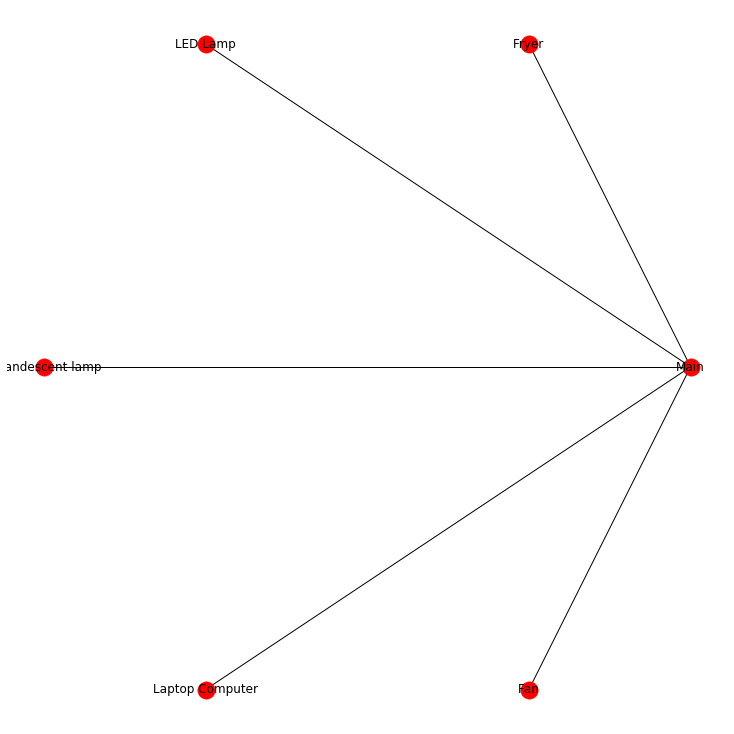

In [45]:
rcParams['figure.figsize'] = (10, 10)
fig = elec.draw_wiring_graph_2(show_meter_labels=False)

#etiquetas, opcional
pos = nx.shell_layout(fig[0])
nx.draw_networkx_labels(fig[0], pos, labels=Meters)

#guarda gráfico
plt.savefig('./data/images/2.1_Network.svg', bbox_inches='tight', transparent=True)
pass

NOTA: La funcion draw_wiring_graph  presenta problemas con Matplotlib 3.3.0 (y por tanto con NILMTK) segun issue 868 ( https://github.com/nilmtk/nilmtk/issues/868)), por lo que necesitamos reemplazar la función original para poder representar graficamente correctamente las etiquetas, por lo que vamos a crear la nueva funcion elec.draw_wiring_graph_2 que guardaremos en la ruta \user\USUARIO\anaconda3\envs\nilmtk-env\Lib\site-packages\nilmtk\metergroup.py

## Carga de datos en memoria

Intervalos de tiempo en que se registran datos: `elec[1]`

Timestamp en "timezone" es  "Europe/Madrid" https://www.epochconverter.com/

In [46]:
elec.get_timeframe()

TimeFrame(start='2023-05-17 09:34:03.472000+02:00', end='2023-05-17 18:37:27.061000+02:00', empty=False)

Una manera rápida de cargar varios datos de medidores en un DataFrame es utilizar la función `dataframe_of_meters` e indicar cual medida se desea importar desde el MeterGroup.

Observese que solo podemos tomar datos de potencia :active', 'apparent', 'reactive'.




Vamos a mostrar la potencia activa de los medidores del 2 al 6 (es decir todos menos el principal). 

In [47]:
Devices = elec.select(instance=[2,3,4,5,6])  #nuevo MeterGroup de dispositivos
df = Devices.dataframe_of_meters(ac_type='active') # active crea Dataframe badado en la potencia Valid AC types = ['active', 'apparent', 'reactive'].
#etiquetas
df.columns = [list(labels['Meters'][1:8])]
df

,Fryer,LED Lamp,Incandescent lamp,Laptop Computer,Fan
2023-05-17 09:34:00+02:00,0.000000,0.0,0.000000,0.000000,0.000000
2023-05-17 09:35:00+02:00,6.686111,0.0,30.784721,0.298611,0.845714
2023-05-17 09:36:00+02:00,8.372602,0.0,8.023288,0.000000,0.000000
2023-05-17 09:37:00+02:00,8.581690,0.0,47.632393,0.000000,0.000000
2023-05-17 09:38:00+02:00,5.523943,0.0,47.576057,0.000000,0.000000
...,...,...,...,...,...
2023-05-17 18:33:00+02:00,20.384127,0.0,46.682541,0.000000,26.026985
2023-05-17 18:34:00+02:00,20.276190,0.0,46.506348,0.000000,25.912903
2023-05-17 18:35:00+02:00,20.168255,0.0,46.282539,0.000000,25.768253
2023-05-17 18:36:00+02:00,18.968254,0.0,43.496826,0.000000,24.571428


Ahora veamos la potencia reactiva de los medidores del 2 al 6 (todos menos el principal).

Se puede obtener el tipo de datos usado para cada medidor usandola clase info

In [48]:
df.info() #información del DataFrame

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 544 entries, 2023-05-17 09:34:00+02:00 to 2023-05-17 18:37:00+02:00
Freq: 60S
Data columns (total 5 columns):
(Fryer,)                544 non-null float32
(LED Lamp,)             544 non-null float32
(Incandescent lamp,)    544 non-null float32
(Laptop Computer,)      544 non-null float32
(Fan,)                  544 non-null float32
dtypes: float32(5)
memory usage: 14.9 KB


Podemos asignar individualmente datos de medidores en un Dataframe




Vemos para el meter nº 1(main)  tenemos la siguinte tabla que nos muestra todas las medidas

In [49]:
t0 = '2023-05-17 09:34:03+01:00' #tiempo inicial
t1 = '2023-05-17 18:37:27+01:00' #tiempo final


df_main = next(elec[1].load())[t0:t1] #DataFrame medidor 
df_main

physical_quantity,current,frequency,power,voltage,pf
type,,,active,,
2023-05-17 10:34:03.560000+02:00,0.21,50.000000,40.500000,244.699997,0.80
2023-05-17 10:34:04.420000+02:00,0.21,50.000000,40.500000,244.699997,0.80
2023-05-17 10:34:05.283000+02:00,0.25,50.000000,55.799999,244.600006,0.91
2023-05-17 10:34:06.158000+02:00,0.25,50.000000,54.799999,244.000000,0.91
2023-05-17 10:34:07.030000+02:00,0.25,50.000000,54.799999,244.000000,0.91
...,...,...,...,...,...
2023-05-17 18:37:23.379000+02:00,0.00,49.900002,0.000000,236.899994,0.00
2023-05-17 18:37:24.295000+02:00,0.00,49.900002,0.000000,236.899994,0.00
2023-05-17 18:37:25.217000+02:00,0.00,50.000000,0.000000,236.899994,0.00


Se puede visualizar solo la cabecera de los datos

In [50]:
df_main.head()

physical_quantity,current,frequency,power,voltage,pf
type,,,active,,
2023-05-17 10:34:03.560000+02:00,0.21,50.0,40.500000,244.699997,0.80
2023-05-17 10:34:04.420000+02:00,0.21,50.0,40.500000,244.699997,0.80
2023-05-17 10:34:05.283000+02:00,0.25,50.0,55.799999,244.600006,0.91
2023-05-17 10:34:06.158000+02:00,0.25,50.0,54.799999,244.000000,0.91
2023-05-17 10:34:07.030000+02:00,0.25,50.0,54.799999,244.000000,0.91


Vemos para el meter nº 2(Fryer)  tenemos la siguinte tabla que nos muestra todas las medidas

In [51]:



df_fryer = next(elec[2].load())[t0:t1] #DataFrame medidor 
df_fryer

physical_quantity,current,frequency,power,voltage,pf
type,,,active,,
2023-05-17 10:34:03.560000+02:00,0.00,50.000000,0.0,245.100006,0.78
2023-05-17 10:34:04.420000+02:00,0.07,50.000000,15.6,244.899994,0.91
2023-05-17 10:34:05.283000+02:00,0.07,50.000000,15.3,244.300003,0.91
2023-05-17 10:34:06.158000+02:00,0.07,50.000000,15.3,244.300003,0.91
2023-05-17 10:34:07.030000+02:00,0.07,50.000000,15.1,244.399994,0.91
...,...,...,...,...,...
2023-05-17 18:37:23.379000+02:00,0.00,49.900002,0.0,237.199997,0.00
2023-05-17 18:37:24.295000+02:00,0.00,50.000000,0.0,237.300003,0.00
2023-05-17 18:37:25.217000+02:00,0.00,50.000000,0.0,237.300003,0.00


Vemos para el meter nº 3(led)  tenemos  la siguinte tabla que nos muestra todas las medidas: 

In [52]:
df_LED = next(elec[3].load())[t0:t1] #DataFrame medidor boiler
df_LED

physical_quantity,current,frequency,power,voltage,pf
type,,,active,,
2023-05-17 10:34:03.560000+02:00,0.06,50.000000,13.200000,244.899994,0.84
2023-05-17 10:34:04.420000+02:00,0.07,50.000000,16.299999,244.699997,0.90
2023-05-17 10:34:05.283000+02:00,0.07,50.000000,16.299999,244.699997,0.90
2023-05-17 10:34:06.158000+02:00,0.07,50.000000,16.000000,244.199997,0.90
2023-05-17 10:34:07.030000+02:00,0.07,50.000000,15.800000,244.199997,0.90
...,...,...,...,...,...
2023-05-17 18:37:23.379000+02:00,0.00,50.000000,0.000000,237.100006,0.00
2023-05-17 18:37:24.295000+02:00,0.00,49.900002,0.000000,237.100006,0.00
2023-05-17 18:37:25.217000+02:00,0.00,50.000000,0.000000,237.100006,0.00


Veamos para el meter nº 4(lamp)  tenemos la siguinte tabla que nos muestra todas las medidas

In [53]:
df_lamp = next(elec[4].load())[t0:t1] #DataFrame medidor boiler
df_lamp

physical_quantity,current,frequency,power,voltage,pf
type,,,active,,
2023-05-17 10:34:03.560000+02:00,0.0,50.000000,0.0,245.000000,0.0
2023-05-17 10:34:04.420000+02:00,0.0,50.000000,0.0,244.800003,0.0
2023-05-17 10:34:05.283000+02:00,0.0,50.000000,0.0,244.800003,0.0
2023-05-17 10:34:06.158000+02:00,0.0,50.000000,0.0,244.199997,0.0
2023-05-17 10:34:07.030000+02:00,0.0,50.000000,0.0,244.199997,0.0
...,...,...,...,...,...
2023-05-17 18:37:23.379000+02:00,0.0,50.000000,0.0,237.100006,0.0
2023-05-17 18:37:24.295000+02:00,0.0,49.900002,0.0,237.100006,0.0
2023-05-17 18:37:25.217000+02:00,0.0,50.000000,0.0,237.100006,0.0


Veamos para el meter nº 5(Laptop)  tenemos la siguinte tabla que nos muestra todas las medidas

In [54]:
df_laptop = next(elec[5].load())[t0:t1] #DataFrame medidor boiler
df_laptop

physical_quantity,current,frequency,power,voltage,pf
type,,,active,,
2023-05-17 10:34:03.560000+02:00,0.09,50.000000,17.799999,245.300003,0.78
2023-05-17 10:34:04.420000+02:00,0.11,50.000000,24.100000,245.000000,0.91
2023-05-17 10:34:05.283000+02:00,0.11,50.000000,24.100000,245.000000,0.91
2023-05-17 10:34:06.158000+02:00,0.11,50.000000,23.700001,244.500000,0.91
2023-05-17 10:34:07.030000+02:00,0.10,50.000000,23.299999,244.500000,0.91
...,...,...,...,...,...
2023-05-17 18:37:23.379000+02:00,0.00,49.900002,0.000000,237.399994,0.00
2023-05-17 18:37:24.295000+02:00,0.00,50.000000,0.000000,237.399994,0.00
2023-05-17 18:37:25.217000+02:00,0.00,49.900002,0.000000,237.399994,0.00


Veamos para el ultimo meter nº 6(fan)  tenemos la siguinte tabla que nos muestra todas las medidas

In [55]:
df_fan = next(elec[6].load())[t0:t1] #DataFrame medidor boiler
df_fan

physical_quantity,current,frequency,power,voltage,pf
type,,,active,,
2023-05-17 10:34:03.560000+02:00,0.0,50.000000,0.0,245.300003,0.0
2023-05-17 10:34:04.420000+02:00,0.0,50.000000,0.0,245.300003,0.0
2023-05-17 10:34:05.283000+02:00,0.0,50.000000,0.0,244.699997,0.0
2023-05-17 10:34:06.158000+02:00,0.0,50.000000,0.0,244.699997,0.0
2023-05-17 10:34:07.030000+02:00,0.0,50.000000,0.0,244.600006,0.0
...,...,...,...,...,...
2023-05-17 18:37:23.379000+02:00,0.0,50.000000,0.0,237.399994,0.0
2023-05-17 18:37:24.295000+02:00,0.0,49.900002,0.0,237.500000,0.0
2023-05-17 18:37:25.217000+02:00,0.0,50.000000,0.0,237.399994,0.0


### Proporcion de energia submedida

Calculemos la proporción de energía submedida en el edificio 1:

In [56]:
elec.proportion_of_energy_submetered()

Running MeterGroup.proportion_of_energy_submetered...


0.8961214099432802

Tenga en cuenta que NILMTK ha emitido una advertencia de que Mains usa un tipo diferente de medición de potencia que todos los submedidores, por lo que no es una comparación del todo precisa. Lo que plantea la pregunta: ¿qué tipo de medidas de potencia se utilizan para la red y los submedidores? Vamos a averiguar.

### Carga una columna simple de datos de  potencia

Usar fan.power_series() que devuelve un generador de objetos pandas.Series unidimensionales, cada uno de los cuales contiene datos de energía utilizando el tipo de CA más 'sensible':

In [57]:
series = next(fan.power_series())
series.head()

2023-05-17 09:34:04.264000+02:00    0.0
2023-05-17 09:34:05.076000+02:00    0.0
2023-05-17 09:34:05.883000+02:00    0.0
2023-05-17 09:34:06.704000+02:00    0.0
2023-05-17 09:34:07.533000+02:00    0.0
Name: (power, active), dtype: float32

### Especificar cantidad_física o tipo de CA

Para cargar datos de voltaje:

In [58]:
df = next(fan.load(physical_quantity='voltage'))
df.head()

physical_quantity,voltage
type,
2023-05-17 09:34:04.264000+02:00,242.100006
2023-05-17 09:34:05.076000+02:00,242.100006
2023-05-17 09:34:05.883000+02:00,242.100006
2023-05-17 09:34:06.704000+02:00,242.100006
2023-05-17 09:34:07.533000+02:00,241.899994


In [59]:
df = next(fan.load(physical_quantity = 'power'))
df.head()

physical_quantity,power
type,active
2023-05-17 09:34:04.264000+02:00,0.0
2023-05-17 09:34:05.076000+02:00,0.0
2023-05-17 09:34:05.883000+02:00,0.0
2023-05-17 09:34:06.704000+02:00,0.0
2023-05-17 09:34:07.533000+02:00,0.0


### Cargando especificando el tipo de CA

In [60]:
df = next(fan.load(ac_type='active'))
df.head()

physical_quantity,power
type,active
2023-05-17 09:34:04.264000+02:00,0.0
2023-05-17 09:34:05.076000+02:00,0.0
2023-05-17 09:34:05.883000+02:00,0.0
2023-05-17 09:34:06.704000+02:00,0.0
2023-05-17 09:34:07.533000+02:00,0.0


### Cargando por remuestreo a un período específico

In [61]:
# resample por minutos (i.e. con un simple periodo de  60 secs)
df = next(fan.load(ac_type='active', sample_period=60))
df.head()

physical_quantity,power
type,active
2023-05-17 09:34:00+02:00,0.000000
2023-05-17 09:35:00+02:00,0.845714
2023-05-17 09:36:00+02:00,0.000000
2023-05-17 09:37:00+02:00,0.000000
2023-05-17 09:38:00+02:00,0.000000


# Estadisticas para MeterGroups

Calculemos la proporción de energía submedida en el edificio 1 

In [62]:
elec.proportion_of_energy_submetered()

Running MeterGroup.proportion_of_energy_submetered...


0.8961214099432802

## Potencia activa

In [63]:
mains = elec.mains()
mains.available_ac_types('power')
elec.submeters().available_ac_types('power')
next(elec.load())

Loading data for meter ElecMeterID(instance=6, building=1, dataset='DSUAL')     
Done loading data all meters for this chunk.


physical_quantity,current,frequency,power,voltage,pf
type,NaN,NaN,active,NaN,NaN
2023-05-17 09:34:00+02:00,NaN,NaN,0.000000,NaN,NaN
2023-05-17 09:35:00+02:00,NaN,NaN,83.470711,NaN,NaN
2023-05-17 09:36:00+02:00,NaN,NaN,40.410961,NaN,NaN
2023-05-17 09:37:00+02:00,NaN,NaN,115.757744,NaN,NaN
2023-05-17 09:38:00+02:00,NaN,NaN,114.378876,NaN,NaN
...,...,...,...,...,...
2023-05-17 18:33:00+02:00,NaN,NaN,197.180939,NaN,NaN
2023-05-17 18:34:00+02:00,NaN,NaN,196.398621,NaN,NaN
2023-05-17 18:35:00+02:00,NaN,NaN,195.379364,NaN,NaN


### Energia Total

In [64]:
elec.mains().total_energy() # returns kWh

active    0.907043
dtype: float64

In [65]:
#energía por submedidor kwH diaria promedio
d1=elec.energy_per_meter(ac_type=['active'], per_period='D').round(2) # kWh, per_period='D'
#energía por submedidor kwH semanal promedio
d2=elec.energy_per_meter(ac_type=['active'], per_period='W').round(2) # kWh, per_period='W'
#energía por submedidor kwH total
d3=elec.energy_per_meter(ac_type=['active'], per_period='M').round(2) # kWh, per_period='D'

#df=d1.append([d2,d3]).drop(index=['apparent', 'reactive']).transpose()

df=d1.append([d2,d3]).drop(index=['apparent', 'reactive']).transpose()


df.index = [list(labels['Meters'])]
df.columns = ['kWh Día','kWh Sem.','kwh Mens']
df

6/6 ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])nstance=1)])])

,kWh Día,kWh Sem.,kwh Mens
Main,2.40,16.83,72.11
Fryer,0.47,3.31,14.21
LED Lamp,0.01,0.05,0.21
Incandescent lamp,1.05,7.38,31.64
Laptop Computer,0.03,0.23,0.97
Fan,0.59,4.11,17.60


### Energia por submedidor

Veamos la energia  para el submedidor

In [66]:
energy_per_meter = elec.submeters().energy_per_meter() # kWh, again
energy_per_meter

5/5 ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])nstance=1)])])

,"(2, 1, DSUAL)","(3, 1, DSUAL)","(4, 1, DSUAL)","(5, 1, DSUAL)","(6, 1, DSUAL)"
active,0.178683,0.002582,0.398014,0.012201,0.221341
apparent,NaN,NaN,NaN,NaN,NaN
reactive,NaN,NaN,NaN,NaN,NaN


Los encabezados de columna son los números de instancia de ElecMeter.

La funcion `fraction_per_meter` lo mismo que `energy_per_submeter` excepto que devuelve la fraccion de energia por medidor

Seleccionar contadores en función de su consumo energético

Hagamos un nuevo MeterGroup que solo contenga los ElecMeters que usaron más de 20 kWh:

In [67]:
# energy_per_meter es un DataFrame donde cada fila es un
# tipo de potencia ('activa', 'reactiva' o 'aparente').
# Todos los medidores de electrodomésticos en REDD están registrados como 'activos', así que seleccione
# la fila 'activa':
energy_per_meter = energy_per_meter.loc['active']
more_than_20 = energy_per_meter[energy_per_meter > 20]
more_than_20

Series([], Name: active, dtype: float64)

In [68]:
instances = more_than_20.index
instances

Index([], dtype='object')

### Trazar la fracción del consumo de energía de cada aparato

In [69]:
fraction = elec.submeters().fraction_per_meter().dropna()

5/5 ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])nstance=1)])])

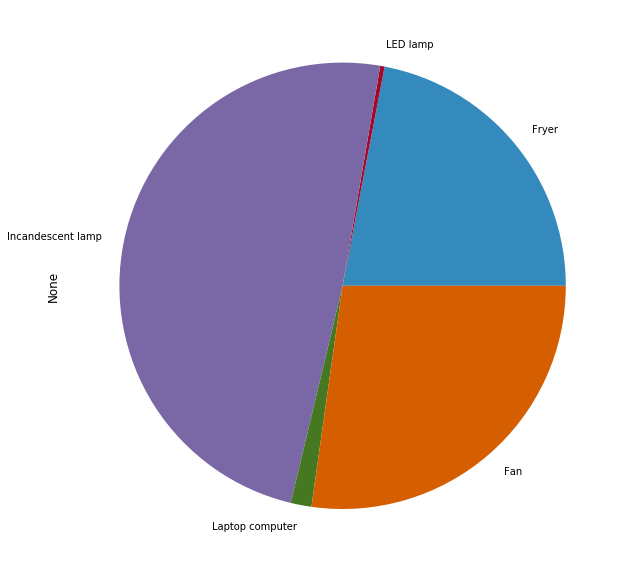

In [70]:
# Creacion de convenientes etiquetas
labels = elec.get_labels(fraction.index)
plt.figure(figsize=(10,30))
fraction.plot(kind='pie', labels=labels);

## Gráficos

### Fan

Veamos ahora en forma de grafico las potencia,frecuencia, la tension y la corriente para el medidor numero 2 Primero veamos el timeframe.

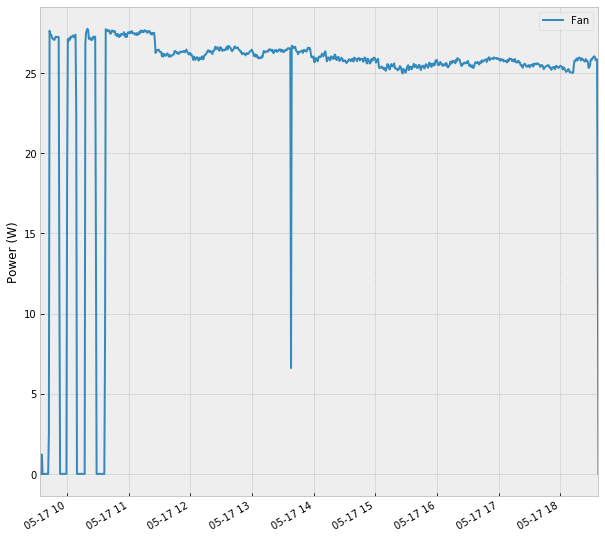

In [71]:
fan.get_timeframe()
fan.plot()

Ahora vamos a mostrar los diferentes de la potencia, tension y corriente

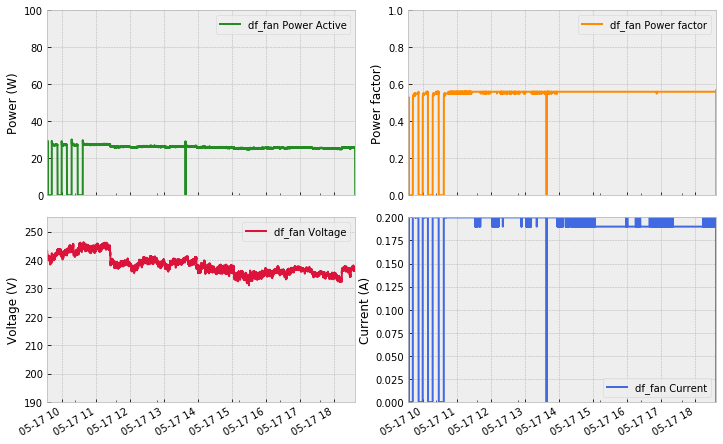

In [80]:
df_fan = next(elec[6].load()) #DataFrame medidor 



df_vac = next(elec[5].load())[t0:t1] #DataFrame medidor 

#graficos

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_fan['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_fan Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,100])

df_fan['pf'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_fan Power factor'])
ax2.set(ylabel='Power factor)')
ax2.set_ylim([0,1])

df_fan['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_fan Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_fan['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_fan Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,0.2])

#guarda gráfico
#plt.savefig('./data/images/df_vac.svg', bbox_inches='tight', transparent=True)
pass

### Laptop

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 3 (Laptop)

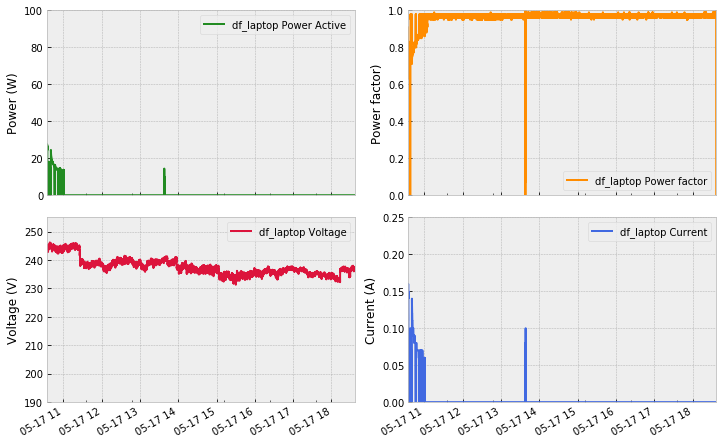

In [74]:
df_laptop = next(elec[5].load())[t0:t1] #DataFrame medidor 

#graficos

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_laptop['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_laptop Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,100])

df_laptop['pf'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_laptop Power factor'])
ax2.set(ylabel='Power factor)')
ax2.set_ylim([0,1])

df_laptop['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_laptop Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_laptop['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_laptop Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,0.25])


#guarda gráfico
#plt.savefig('./data/images/df_vac.svg', bbox_inches='tight', transparent=True)
pass

### Lamp

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 4 (Incandescent lamp)

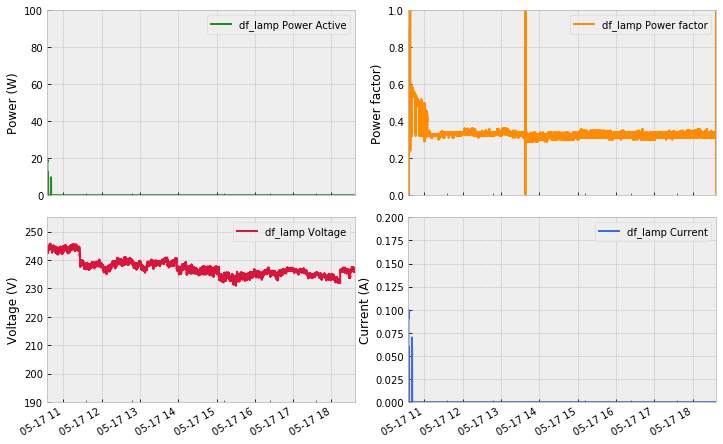

In [79]:
df_lamp = next(elec[3].load())[t0:t1] #DataFrame medidor 

#graficos

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_lamp['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_lamp Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,100])

df_lamp['pf'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_lamp Power factor'])
ax2.set(ylabel='Power factor)')
ax2.set_ylim([0,1])

df_lamp['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_lamp Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_lamp['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_lamp Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,0.2])


#guarda gráfico
#plt.savefig('./data/images/df_vac.svg', bbox_inches='tight', transparent=True)
pass

### LED

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 5 (lED Light)

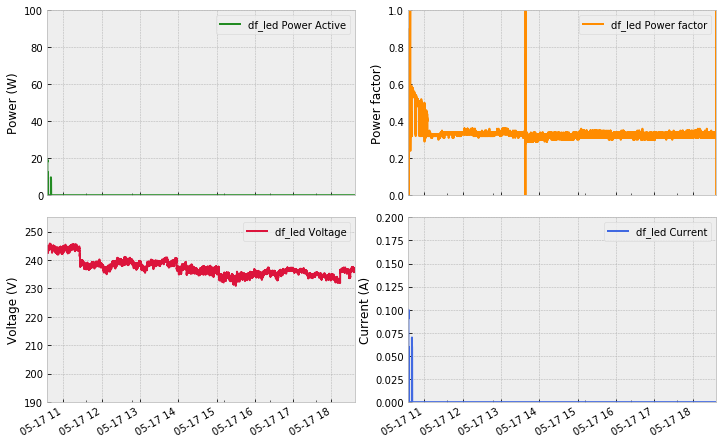

In [78]:
df_led = next(elec[3].load())[t0:t1] #DataFrame medidor 

#graficos

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_led['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_led Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,100])

df_led['pf'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_led Power factor'])
ax2.set(ylabel='Power factor)')
ax2.set_ylim([0,1])

df_led['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_led Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_led['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_led Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,0.2])

#guarda gráfico
#plt.savefig('./data/images/df_vac.svg', bbox_inches='tight', transparent=True)
pass

### Fryer

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 6 (tv)

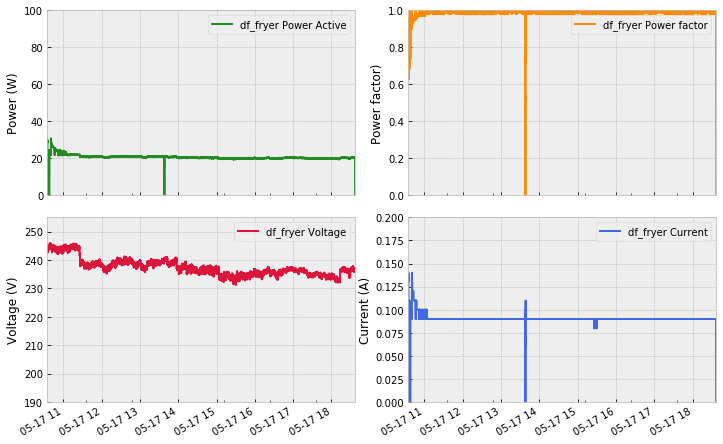

In [77]:
df_fr = next(elec[2].load())[t0:t1] #DataFrame medidor 

#graficos

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_fr['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_fryer Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,100])

df_fr['pf'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_fryer Power factor'])
ax2.set(ylabel='Power factor)')
ax2.set_ylim([0,1])

df_fr['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_fryer Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_fr['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_fryer Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,0.2])


#guarda gráfico
#plt.savefig('./data/images/df_vac.svg', bbox_inches='tight', transparent=True)
pass

Vemos el comportamiento de un pequeño ventilador cuyo consumo es casi inapreciable y no presenta energia reaciva. Es llamativo el hecho de que haya fluctuaciones apreciables en la grafica de la tension asi como  tambien un pequeño pico de corriente ( este hecho solo en el momento del arranque). 

### M.Principal

Por ultimo veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 5 (TV)

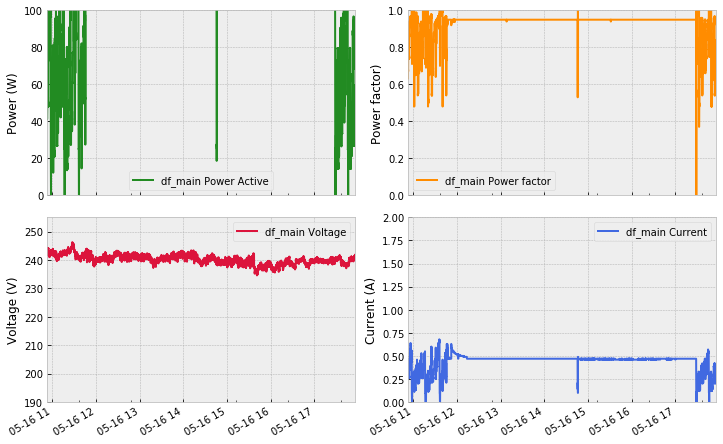

In [77]:
df_main = next(elec[1].load())[t0:t1] #DataFrame medidor 

#graficos

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_main['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_main Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,100])

df_main['pf'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_main Power factor'])
ax2.set(ylabel='Power factor)')
ax2.set_ylim([0,1])

df_main['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_main Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_main['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_main Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,2])


#guarda gráfico
#plt.savefig('./data/images/df_vac.svg', bbox_inches='tight', transparent=True)
pass

Por ultimo vemos la grafica de un monitor cuyos resultado arroja tanto potencia activa como reactiva  ( por la fuente conmutada) pero ninguna fluctuacion en la tension ni en en la corriente 

### Trazar los electrodomésticos cuando estén en uso

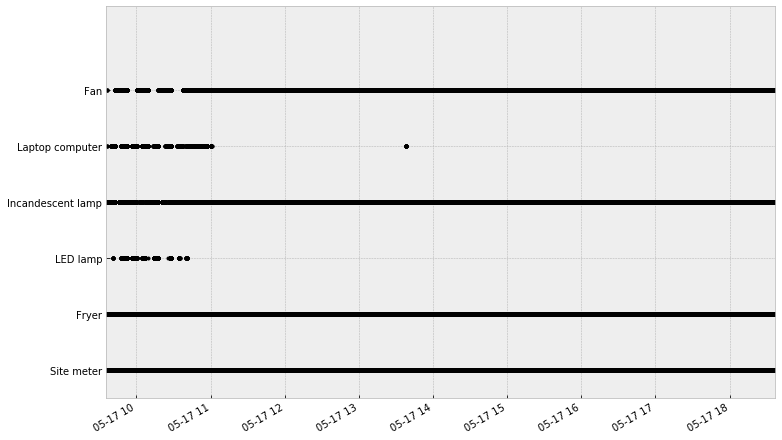

In [82]:
#sns.set_palette("Set3", n_colors=12)
# Set a threshold to remove residual power noise when devices are off
elec.plot_when_on(on_power_threshold = 1)

## Trazar datos submedidos para un solo día

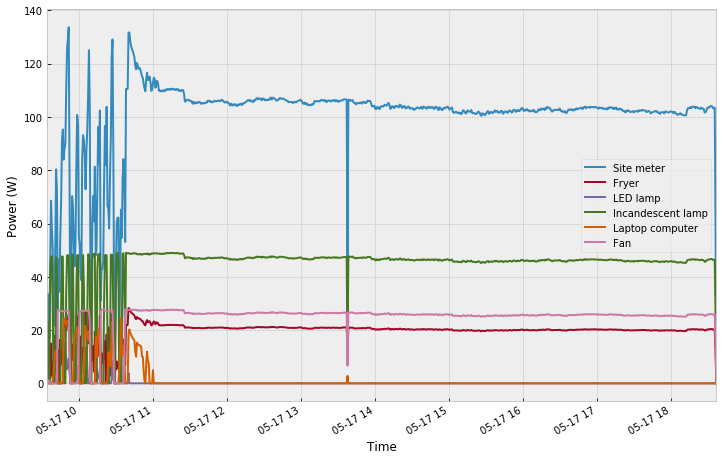

In [87]:
ompm.set_window(start='2023-05-17', end='2023-05-18')
elec.plot();
ax1.set_xticklabels(['1','2','3','4','5','6','7'])
plt.xlabel("Time");

## Gráfico de autocorrelación

In [88]:
from pandas.plotting import autocorrelation_plot

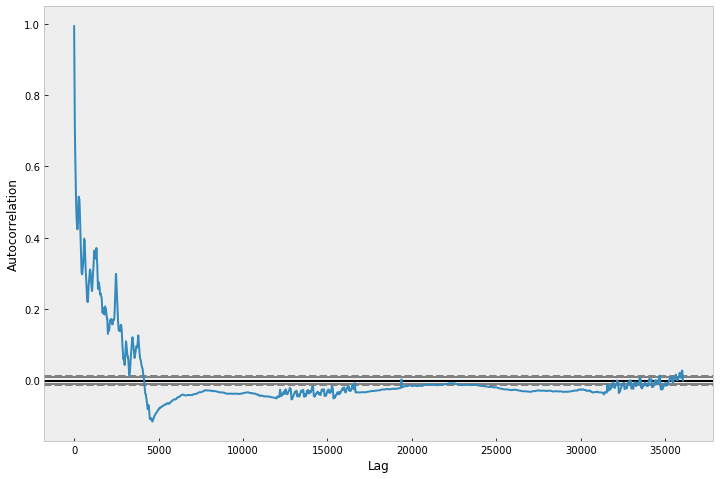

In [89]:
elec.mains().plot_autocorrelation();

## Cambio en el muestreo de datos

Al cambiar el muestro de datos, NILMTK utiliza por defecto el método mean o media aritmética el cual calculará un promedio de los valores que se encuentren de la serie de tiempo, divididos en grupos correspondientes al nuevo periodo de muestreo. Además de este método se pueden especificar otros tales como el primer dato válido (first), la mediana (median), el valor más cercano (nearest), o utilizar el valor inmediatamente posterior (ffill o pad), entre otros.

### Energia activa

Vamos ahora analizar la potencia  activa correspondiente el contador global  usando diferentes periodos de muestreo

In [90]:
m = 1 #meter
method1 = {'how': 'mean'}
method2 = {'how': 'median'}
method3 = {'how': 'first'}

#medición original, cada 1 segundo
df_1s   = next(elec[m].load(ac_type='active',sample_period=1,       resample_kwargs=method1))
#resamples
df1_10s  = next(elec[m].load(ac_type='active', sample_period=10,     resample_kwargs=method1))
df1_30s  = next(elec[m].load(ac_type='active', sample_period=30,     resample_kwargs=method1))
df1_60s  = next(elec[m].load(ac_type='active', sample_period=60*1,   resample_kwargs=method1))
df1_5m   = next(elec[m].load(ac_type='active', sample_period=60*5,   resample_kwargs=method1))
df1_10m  = next(elec[m].load(ac_type='active', sample_period=60*10,  resample_kwargs=method1))
df1_15m  = next(elec[m].load(ac_type='active', sample_period=60*15,  resample_kwargs=method1))
df1_30m  = next(elec[m].load(ac_type='active', sample_period=60*30,  resample_kwargs=method1))

df2_10s  = next(elec[m].load(ac_type='active', sample_period=10,    resample_kwargs=method2))
df2_30s  = next(elec[m].load(ac_type='active', sample_period=30,    resample_kwargs=method2))
df2_60s  = next(elec[m].load(ac_type='active', sample_period=60*1,  resample_kwargs=method2))
df2_5m   = next(elec[m].load(ac_type='active', sample_period=60*5,  resample_kwargs=method2))
df2_10m  = next(elec[m].load(ac_type='active', sample_period=60*10,  resample_kwargs=method2))
df2_15m  = next(elec[m].load(ac_type='active', sample_period=60*15,  resample_kwargs=method2))
df2_30m  = next(elec[m].load(ac_type='active', sample_period=60*30,  resample_kwargs=method2))

df3_10s  = next(elec[m].load(ac_type='active', sample_period=10,    resample_kwargs=method3))
df3_30s  = next(elec[m].load(ac_type='active', sample_period=30,    resample_kwargs=method3))
df3_60s  = next(elec[m].load(ac_type='active', sample_period=60*1,  resample_kwargs=method3))
df3_5m   = next(elec[m].load(ac_type='active', sample_period=60*5,  resample_kwargs=method3))
df3_10m  = next(elec[m].load(ac_type='active', sample_period=60*10,  resample_kwargs=method3))
df3_15m  = next(elec[m].load(ac_type='active', sample_period=60*15,  resample_kwargs=method3))
df3_30m  = next(elec[m].load(ac_type='active', sample_period=60*30,  resample_kwargs=method3))

#dataframe completo
dfs1=[df_1s,df1_10s,df1_30s,df1_60s,df1_5m,df1_10m,df1_15m,df1_30m]
#dataframe completo
dfs2=[df_1s,df2_10s,df2_30s,df2_60s,df2_5m,df2_10m,df2_15m,df2_30m]
#dataframe completo
dfs3=[df_1s,df3_10s,df3_30s,df3_60s,df3_5m,df3_10m,df3_15m,df3_30m]

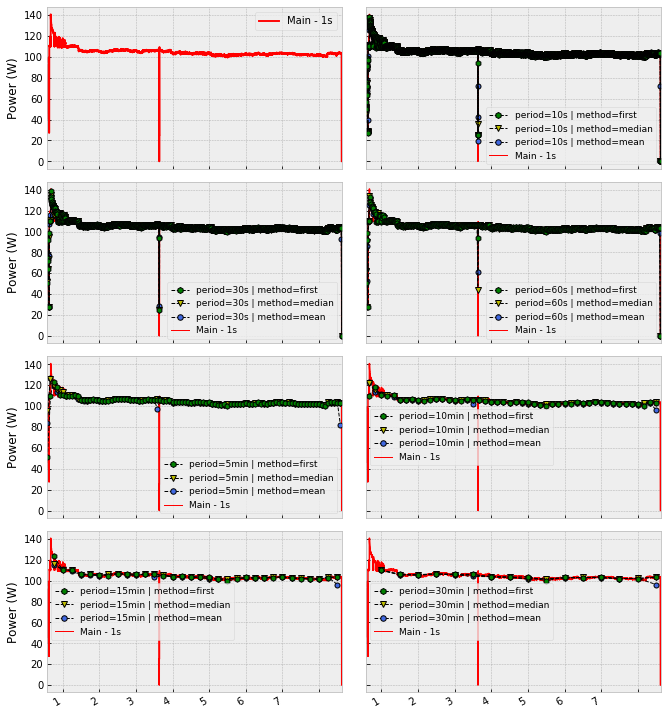

In [91]:
rcParams['figure.figsize'] = (11, 14)



labels_ = ['Main - 1s','10s','30s','60s','5min','10min','15min','30min']
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(4, 2, sharex=True, sharey=True,
                                                                   gridspec_kw={'hspace': 0.08, 'wspace': 0.08})
i = 1
for ax in fig.get_axes():   
    if ax == ax1:
        df_1s[t0:t1].plot(ax=ax,linewidth=1.9,color='r')
        ax.legend([labels_[0]])               
    else:
        import matplotlib.lines as mlines
        df_1s[t0:t1].plot(ax=ax,linewidth=1.5,color='r') 
        dfs1[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="o", markersize=5, markerfacecolor='royalblue')    
        dfs2[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="v", markersize=5.5, markerfacecolor='y')
        dfs3[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="h", markersize=5.5, markerfacecolor='g')
        #etiquetas
        line0 = mlines.Line2D([], [], lw=1, c='red', label= labels_[0])
        line1 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="o", markersize=5.5,
                              markerfacecolor='royalblue', label='period='+labels_[i]+' | method=mean')
        line2 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="v", markersize=6,
                              markerfacecolor='y', label='period='+labels_[i] + ' | method=median')
        ax.legend(handles=[line2, line1, line0], fontsize=9)
        line3 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="h", markersize=6,
                              markerfacecolor='g', label='period='+labels_[i] + ' | method=first')
        ax.legend(handles=[line3, line2, line1, line0], fontsize=9)
        plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
        i = i+1
    ax.set(ylabel='Power (W)')


ax1.minorticks_off()
ax1.set_xticklabels(['1','2','3','4','5','6','7'])

#guarda gráfico
plt.savefig('./data/images/2.3_Resample.svg', bbox_inches='tight', transparent=True)
pass

# PASO 3  ANALISIS  Y ESTADISTICAS

In [92]:
#dataset de referencia 
ompm = DataSet('ualm2.h5')

elec=ompm.buildings[1].elec # Todos los medidores

print (elec)

labels = pd.DataFrame({'Instances': list(range(1,7)),
                       'Meters': ['Main', 'Fryer', 'LED Lamp',  'Incandescent lamp','Laptop Computer', 'Fan']})

Meters={}
for x in range(len(labels)): Meters[elec[x+1]]=labels['Meters'][x] 
    
print(Meters)

days=[ '2023-05-17 09:34:03+01:00', '2023-05-17 18:37:27+01:00'] #tiempo final


colors_1 = ['tab:red','tab:brown','tab:gray','tab:pink','tab:blue','tab:orange']
colors_2 = [colors_1[0]]+colors_1[4:]

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='fryer', instance=1)])
  ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='LED lamp', instance=1)])
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='incandescent lamp', instance=1)])
  ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='laptop computer', instance=1)])
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
)
{ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[]): 'Main', ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='fryer', instance=1)]): 'Fryer', ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='LED lamp', instance=1)]): 'LED Lamp', ElecMeter(instance=4, building=1, dataset='DS

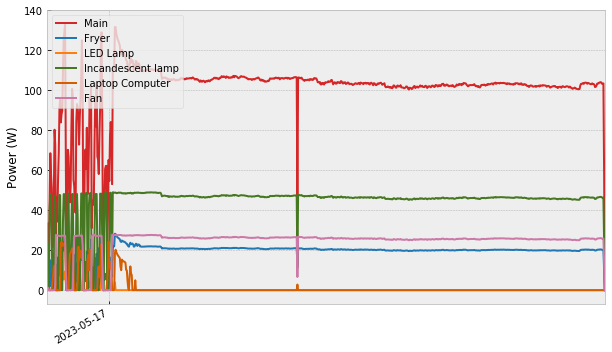

In [93]:
rcParams['figure.figsize'] = (10, 6)


tf1=TimeFrame()
ax=elec.select(instance=[1,2,3,4,5,6]).plot()
#colores
c=0
for col in colors_2:    
    ax.get_lines()[c].set_color(col)
    c+=1    
#etiquetas
ax.legend([list(Meters.values())[0]]+list(Meters.values())[1:10])
ax.set(xticks=days[:1])
#guarda gráfico
plt.savefig('./data/images/2.5_Plot_all_meters_week1.svg', bbox_inches='tight', transparent=True)
plt.show()
pass

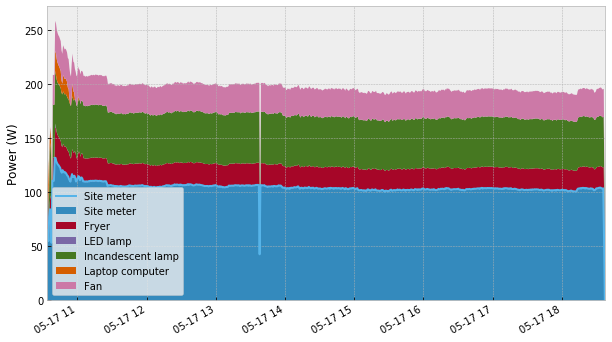

In [94]:
t=TimeFrame(start='2023-05-17 09:34:03+01:00', end='2023-05-17 18:37:27+01:00')
elec.select(instance=[1,2,3,4,5,6]).plot(kind='area',timeframe=t)
ax=elec[1].plot(timeframe=t)

#ax.set(ylim=(-100,4100))
pass

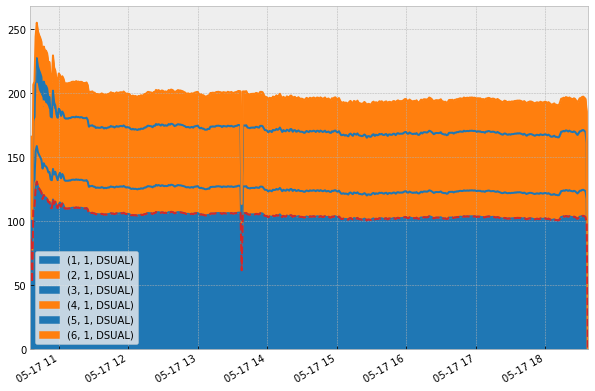

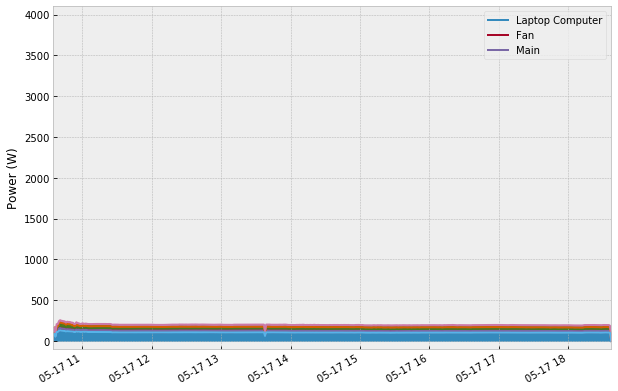

In [95]:
rcParams['figure.figsize'] = (10, 7)

t0 = '2023-05-17 09:34:03+01:00' #tiempo inicial
t1 = '2023-05-17 18:37:27+01:00' #tiempo final

df_1 = elec.select(instance=[1,2,3,4,5,6]).dataframe_of_meters(ac_type='active', sample_period=60)[t0:t1]
df_2 = elec[1].power_series_all_data(ac_type='active', sample_period=60)[t0:t1]

ax1 = df_1.plot(kind='area', color=colors_2[1:])
df_2.plot(ax=ax1, color=colors_1[0], ls='--')

ax1 = df_1.plot(kind='area')
df_2.plot(ax=ax1)
 
#etiquetas
ax1.legend(list(Meters.values())[4:10]+[list(Meters.values())[0]])
#ax1.set_xticklabels(['10:15','10:30','10:45','11:00','11:30','12:30','13:00'])
ax1.set(ylim=(-100,4100))
ax1.set(ylabel='Power (W)')
#guarda gráfico
plt.savefig('./data/images/2.7_Plot_all_meters_03march.svg', bbox_inches='tight', transparent=True)
plt.show()
pass

### Perfil de Voltaje

In [96]:
V1=next(elec[1].load())['voltage']
d = {'Indicador': ['Promedio', 'Máximo', 'Mínimo'],
     'V1':    [round(V1.mean(),1),round(V1.max(),1),round(V1.min(),1)]} #Voltaje R S T mean
     
pd.DataFrame(d)


,Indicador,V1
0,Promedio,237.800003
1,Máximo,245.699997
2,Mínimo,230.800003


In [97]:
V2=next(elec[2].load())['voltage']
V3=next(elec[3].load())['voltage']
V4=next(elec[4].load())['voltage']
V5=next(elec[5].load())['voltage']
V6=next(elec[6].load())['voltage']

In [98]:
d = {'Indicador': ['Promedio', 'Máximo', 'Mínimo'],
     'Fryer':    [round(V2.mean(),1), round(V2.mean(),1), round(V2.mean(),1)], #Voltaje fan
     'Led Lamp':    [round(V3.max(),1),  round(V3.max(),1),  round(V3.max(),1)],  #Voltaje frezer
     'Incandescent Lamp':    [round(V4.min(),1),  round(V4.min(),1),  round(V4.min(),1)],  #Voltaje tv
     'Laptop computer':    [round(V5.min(),1),  round(V5.min(),1),  round(V5.min(),1)],  #Voltaje freezer
     'Fan':    [round(V6.min(),1),  round(V6.min(),1),  round(V6.min(),1)]}  #Voltaje freezer



pd.DataFrame(d)

,Indicador,Fryer,Led Lamp,Incandescent Lamp,Laptop computer,Fan
0,Promedio,238.100006,245.800003,231.0,231.300003,231.100006
1,Máximo,238.100006,245.800003,231.0,231.300003,231.100006
2,Mínimo,238.100006,245.800003,231.0,231.300003,231.100006


## Gráfico del perfil de voltaje

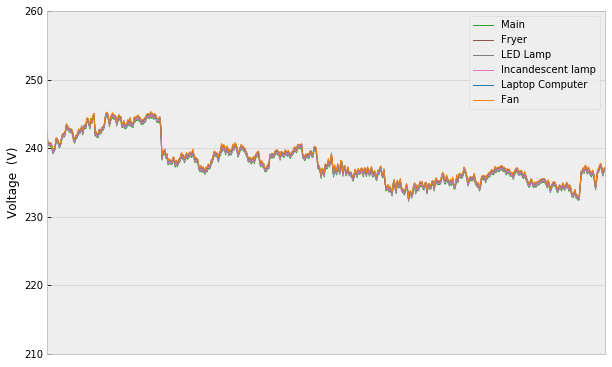

In [99]:
rcParams['figure.figsize'] = (10, 7)

#redimensina el gráfico para reducir tamaño
V1=next(elec[1].load(sample_period=60))['voltage']
V2=next(elec[2].load(sample_period=60))['voltage']
V3=next(elec[3].load(sample_period=60))['voltage']
V4=next(elec[4].load(sample_period=60))['voltage']
V5=next(elec[5].load(sample_period=60))['voltage']
V6=next(elec[6].load(sample_period=60))['voltage']


fig, (ax1) = plt.subplots(1, 1, gridspec_kw={'hspace': 0.4})


V1.plot(ax=ax1, c='tab:green', lw=1)
V2.plot(ax=ax1, c='tab:brown', lw=1)
V3.plot(ax=ax1, c='tab:gray', lw=1)
V4.plot(ax=ax1, c='tab:pink', lw=1)
V5.plot(ax=ax1, c='tab:blue', lw=1)
V6.plot(ax=ax1, c='tab:orange', lw=1)


ax1.legend(list(Meters.values())[0:6], loc='upper right')
ax1.set(ylim=(210,260))
ax1.set(ylabel='Voltage  (V)')
ax1.set(xticks=days[1:])


#guarda gráfico
plt.savefig('./data/images/2.8_voltage_profile.svg', bbox_inches='tight', transparent=True)
plt.show()
pass

### Datos faltantes

In [100]:
elec[1].good_sections(full_results=True).combined() #secciones buenas Main_RST

[TimeFrame(start='2023-05-17 09:34:03.472000+02:00', end='2023-05-17 18:37:27.061000+02:00', empty=False)]

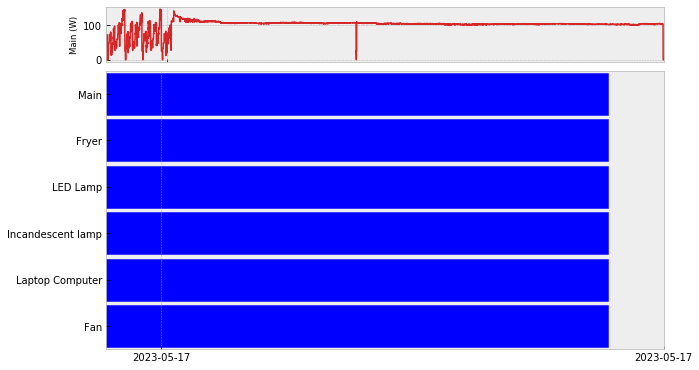

In [101]:
rcParams['figure.figsize'] = (10, 7)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'hspace': 0.05,'height_ratios':[1,5]})

elec[1].power_series_all_data().plot(ax=ax1, c='tab:red', lw=1.5)
ax1.set_ylabel('Main (W)', fontsize=8.5)
ax1.minorticks_off()

elec.plot_good_sections(ax=ax2)
ax2.set_yticklabels(reversed(list(Meters.values())))
ax2.grid(axis='y')
ax2.set(xticks=days)

#guarda gráfico
plt.savefig('./data/images/2.9_good_sections.svg', bbox_inches='tight', transparent=True)
plt.show()
pass

### Tasa de abandono y tiempo de funcionamiento

#### Tasa de abandono
Sin contar cuando el sistema no registra datos superando el tiempo máximo de muestreo, aunque también se perciben perdidas de datos debido al propio sistema de adquisición, lo cual se le llama abandono o dropout. 

La tasa de abandono (dropout rate) es por tanto  un número entre 0 y 1 que especifica la proporción de muestras faltantes. Una tasa de abandono de 0 significa que no faltan muestras y un valor de 1 significaría que faltan todas las muestras (100%). 

#### Tiempo de funcionamiento
El tiempo de funcionamiento calculado estará condicionado al parámetro max_sample_period de cada medidor especificado en los metadatos. Si no se han registrado datos pasado  ese tiempo, se considera el medidor como apagado.

In [102]:
a=[]; b=[]; c=[]
for meter, name in Meters.items():
    a.append(name)
    b.append(str(meter.uptime())) #tiempo de funcionamiento
    c.append(round(meter.dropout_rate()*100,1)) #tasa de abandono

a.append('Total')
b.append(str(elec.uptime()))
c.append(round(elec.dropout_rate()*100,1))
    
df=pd.DataFrame(data=[b,c], columns=a, index=['Uptime','Dropout Rate']).transpose()
df

Calculating dropout_rate for ElecMeterID(instance=6, building=1, dataset='DSUAL') ...   

,Uptime,Dropout Rate
Main,0 days 09:03:23.589000,0
Fryer,0 days 09:03:23.589000,0
LED Lamp,0 days 09:03:23.589000,0
Incandescent lamp,0 days 09:03:23.589000,0
Laptop Computer,0 days 09:03:23.589000,0
Fan,0 days 09:03:22.797000,0
Total,0 days 09:03:23.589000,0


### Registro de actividad

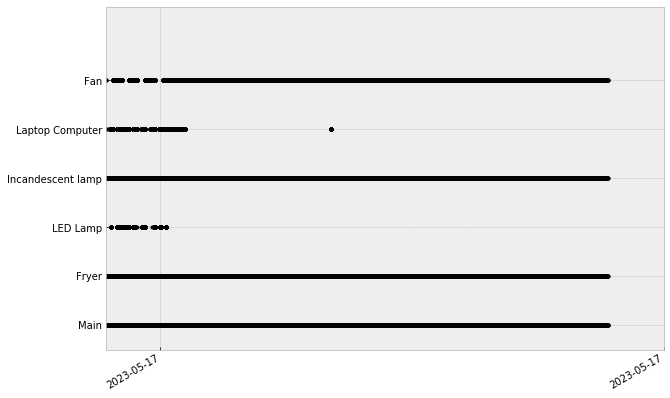

In [103]:
rcParams['figure.figsize'] = (10, 7)

Devices=elec.select(instance=[1,2,3,4,5,6]) #MeterGroup de dispositivos
ax=Devices.plot_when_on(on_power_threshold=1) #umbral de 80 W

#etiquetas
ax.set_yticklabels(list(Meters.values())[0:6])
ax.set(xticks=days)

#guarda gráfico
plt.savefig('./data/images/2.10_On_power1.pdf', bbox_inches='tight', transparent=True)
plt.savefig('./data/images/2.10_On_power1.png', bbox_inches='tight', transparent=True, dpi=1200)
#formatos savefig: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz, evitar guardar .svg por el tamaño del archivo (50Mb)
plt.show()
pass

### Graficos de Actividad por dispositivo y por día

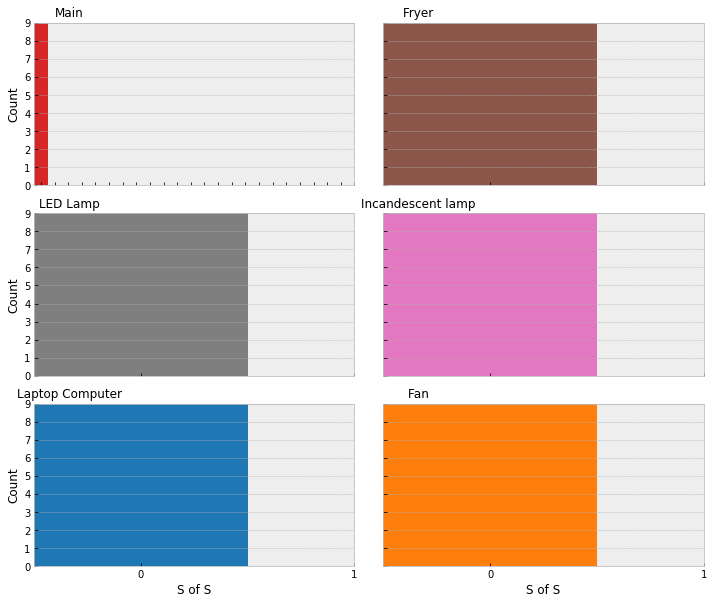

In [104]:
rcParams['figure.figsize'] = (12, 10)
fig, ((ax1, ax2),(ax3, ax4),(ax5, ax6)) = plt.subplots(3, 2, sharex=True, sharey=True,
                                                       gridspec_kw={'hspace': 0.17, 'wspace': 0.09})
m=0
for ax in fig.get_axes(): 
    list(Meters)[m].plot_activity_histogram(ax=ax, period='S', #periodo en segundos
                                            bin_duration='S', #duración en segundos
                                            on_power_threshold=10, #umbral de 10w
                                            plot_kwargs={'color':colors_1[m]})
    #labels
    ttl=ax.set_title(labels['Meters'][m], fontsize=12)
    ttl.set_position([.11, 1])
    m=m+1
    ax.grid(axis='x')

ax1.set(ylim=[0,9])
ax1.set(yticks=[0,1,2,3,4,5,6,7,8,9])
ax1.set(xticks=list(range(0,24)))
#labels
ax1.set(xlabel='')
ax2.set(xlabel='',ylabel='')
ax3.set(xlabel='')
ax4.set(xlabel='',ylabel='')
ax6.set(ylabel='')

#guarda gráfico
plt.savefig('./data/images/2.12_Activity_histogram.svg',bbox_inches='tight', transparent=True)
plt.show()
pass

### Mapa de calor con las mediciones de potencia activa del medidor Main 

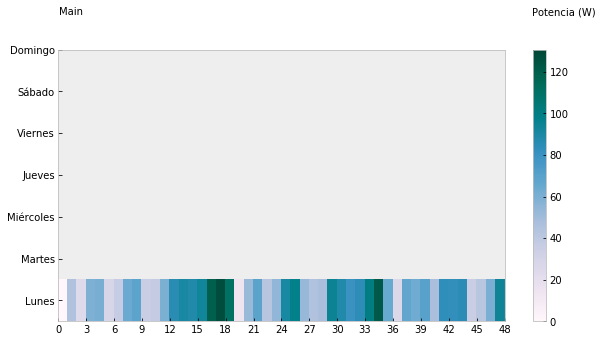

In [105]:
import numpy as np
import pandas as pd

d=elec[1].power_series_all_data(sample_period=60, resample_kwargs={'how': 'mean'}).to_frame()
d.fillna(0,inplace=True)

#tomamos la potencia activa como referencia
d.columns=['active']

#indices para la consulta
d['weekday']=d.index.weekday
d['time']=d.index.time

matrix=d.groupby(['weekday','time']).active.mean().unstack().values

plt.figure(figsize=(10, 5))
ax = plt.gca()
plt.pcolor(matrix,cmap='PuBuGn')
plt.xlim([0,48])
ax.set_xticks(np.arange(0,49,3))
ax.set_yticks(np.arange(0.5,7))
ax.set_yticklabels(['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo'])
plt.colorbar()
ax.text(0.1, 7.4, 'Main', ha='left', va='center')
ax.text(51, 7.4, 'Potencia (W)', ha='left', va='center') 

plt.savefig('./data/images/2.13_Use_power1.svg', bbox_inches='tight', transparent=True)
plt.show()

### Estadísticas de energía

In [106]:
elec[1].total_energy()

active    0.907043
dtype: float64

In [107]:
#energía por submedidor kwH diaria promedio
d1=elec.energy_per_meter(ac_type=['active'], per_period='H').round(2) # kWh, per_period='D'
#energía por submedidor kwH semanal promedio
d2=elec.energy_per_meter(ac_type=['active'], per_period='D').round(2) # kWh, per_period='W'

#energía por submedidor kwH total
#d3=elec.energy_per_meter(ac_type=['active']).round(2) # kWh, per_period='D'
d3=elec.energy_per_meter(ac_type=['active'], per_period='D').round(2) # kWh, per_period='D'


df=d1.append([d2,d3]).drop(index=['apparent', 'reactive']).transpose()
df.index = [list(labels['Meters'])]
df.columns = ['kWh Hora','kWh Dia.','Total kWh']
df

6/6 ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])nstance=1)])])

,kWh Hora,kWh Dia.,Total kWh
Main,0.10,2.40,2.40
Fryer,0.02,0.47,0.47
LED Lamp,0.00,0.01,0.01
Incandescent lamp,0.04,1.05,1.05
Laptop Computer,0.00,0.03,0.03
Fan,0.02,0.59,0.59


### Proporción de energía submedida respecto a la medición agregada.

In [108]:
Devices=elec.select(instance=[1,2,3,4,5,6]) #MeterGroup de dispositivos
#elec.proportion_of_energy_submetered(elec[1], Devices, ac_type='active')
elec.proportion_of_energy_submetered()

Running MeterGroup.proportion_of_energy_submetered...


0.8961214099432802

### Síntesis del dataset
NILMTK ofrece una función que permite obtener un resumen de un MeterGroup en base a los medidores que contiene. Esta función engloba varias de las funciones que se han ejecutado anteriormente.

In [109]:
elec.describe(elec.select(instance=[2,3,4,5,6]))

Running MeterGroup.correlation_of_sum_of_submeters_with_mains...
Loading data for meter ElecMeterID(instance=6, building=1, dataset='DSUAL')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=6, building=1, dataset='DSUAL')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=6, building=1, dataset='DSUAL')     
Done loading data all meters for this chunk.
Running MeterGroup.proportion_of_energy_submetered...
Calculating dropout_rate for ElecMeterID(instance=6, building=1, dataset='DSUAL') ...   

total_n_meters                                                                                6
total_n_site_meters                                                                           1
correlation_of_sum_of_submeters_with_mains                                             0.990188
proportion_of_energy_submetered                                                        0.896121
dropout_rates_ignoring_gaps                                          min=0.0, mean=0.0, max=0.0
mains_sample_period                                                                          60
submeter_sample_period                                                                       60
timeframe                                     start=2023-05-17 09:34:03.472000+02:00, end=20...
total_duration                                                           0 days 09:03:23.589000
mains_uptime                                                             0 days 09:03:23.589000
proportion_uptime                       

# PASO 4  PREPROCESAMIENTO

In [110]:
#dataset de referencia 
ompm = DataSet('ualm2.h5')


elec=ompm.buildings[1].elec # Todos los medidores

print (elec)

labels = pd.DataFrame({'Instances': list(range(1,7)),
                       'Meters': ['Main', 'Fryer', 'LED Lamp',  'Incandescent lamp','Laptop Computer', 'Fan']})


Meters={}
for x in range(len(labels)): Meters[elec[x+1]]=labels['Meters'][x]

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='fryer', instance=1)])
  ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='LED lamp', instance=1)])
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='incandescent lamp', instance=1)])
  ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='laptop computer', instance=1)])
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
)


## Cambio en el muestreo de datos e interpolación

In [111]:
tf=elec[1].good_sections(full_results=True).combined()[0]
tf

TimeFrame(start='2023-05-17 09:34:03.472000+02:00', end='2023-05-17 18:37:27.061000+02:00', empty=False)

In [112]:
ta = '2023-05-17 09:34:03+01:00' #tiempo inicial
tb = '2023-05-17 18:37:27+01:00' #tiempo final

next(elec[1].load(sample_period=10, resample_kwargs={'fill_method':'ffill', 'how': 'mean'}))[ta:tb]

physical_quantity,current,frequency,power,voltage,pf
type,,,active,,
2023-05-17 10:34:10+02:00,0.258182,49.990910,51.745453,243.900009,0.823636
2023-05-17 10:34:20+02:00,0.342500,49.991669,66.166664,243.899994,0.791667
2023-05-17 10:34:30+02:00,0.377273,50.000000,73.300003,243.881821,0.796364
2023-05-17 10:34:40+02:00,0.377500,50.000000,71.691666,243.941666,0.780000
2023-05-17 10:34:50+02:00,0.248182,50.000000,51.781818,244.399994,0.866364
...,...,...,...,...,...
2023-05-17 18:36:40+02:00,0.460000,49.945454,103.581818,236.536362,0.950000
2023-05-17 18:36:50+02:00,0.318000,49.930000,71.809998,236.540009,0.866000
2023-05-17 18:37:00+02:00,0.000000,49.954548,0.000000,236.672729,0.000000


In [113]:
next(elec[1].load(sample_period=10, resample_kwargs={'fill_method':'ffill', 'how': 'first'}))[ta:tb]

physical_quantity,current,frequency,power,voltage,pf
type,,,active,,
2023-05-17 10:34:10+02:00,0.25,50.000000,56.700001,244.000000,0.92
2023-05-17 10:34:20+02:00,0.26,50.000000,52.299999,243.800003,0.83
2023-05-17 10:34:30+02:00,0.35,50.000000,74.900002,243.899994,0.87
2023-05-17 10:34:40+02:00,0.37,50.000000,75.800003,244.000000,0.84
2023-05-17 10:34:50+02:00,0.38,50.000000,74.400002,244.300003,0.81
...,...,...,...,...,...
2023-05-17 18:36:40+02:00,0.46,50.000000,103.500000,236.399994,0.95
2023-05-17 18:36:50+02:00,0.46,49.900002,103.599998,236.600006,0.95
2023-05-17 18:37:00+02:00,0.00,50.000000,0.000000,236.699997,0.00


# Obtener los datos del medidor principal  cada 60 segundos.

Además del parámetro sample_period=60, requerido para cambiar el muestreo a un minuto, se ha especificado como método (how) de cambio de muestreo el que provee NILMTK por defecto (mean). En el mismo diccionario resample_kwargs se ha especificado el parámetro fill_method el cual corresponderá al método elegido para rellenar los huecos. En este caso se especifica el método ffill el cual, ante un hueco, rellenará los datos faltantes hacia adelante con el valor inmediatamente anterior a la serie de tiempo

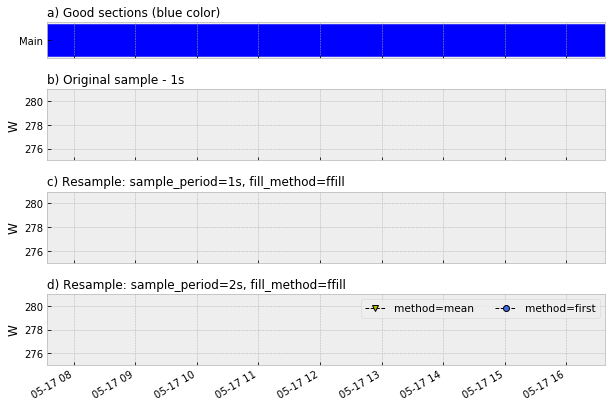

In [114]:
rcParams['figure.figsize'] = (10, 7)

#contador principal
Main=elec.select(instance=[1])

#definición de  gráficas
fig, (ax4, ax1, ax2, ax3) = plt.subplots(4, 1, sharex=True,
                                         gridspec_kw={'hspace': 0.5,'height_ratios':[1.5, 3, 3, 3]})


#sample a segundo
elec[1].power_series_all_data().plot(ax=ax1, color='tab:red', marker="o", lw=1.5)
ax1.minorticks_off()
ax1.set_ylabel('W')
ax1.set_title('b) Original sample - 1s', fontsize=12, loc='left')

ax1.set_ylim(275,281)


#sample a 1 segundo metodo fill
elec[1].power_series_all_data(sample_period=1, resample_kwargs={'fill_method': 'ffill'}).plot(ax=ax2, marker="o", color='tab:red',lw=1.5)
ax2.minorticks_off()
ax2.set_ylabel('W')
ax2.set_title('c) Resample: sample_period=1s, fill_method=ffill', fontsize=12, loc='left')
ax2.set_ylim(275,281)


#sample a 2 segundos metodo fill
elec[1].power_series_all_data(sample_period=4,resample_kwargs={'how': 'first'}).plot(ax=ax3, color='k', lw=1.5, ls='--', marker="o",
                                                           markersize=8, markerfacecolor='royalblue')
elec[1].power_series_all_data(sample_period=4, resample_kwargs={'how': 'mean'}).plot(ax=ax3, color='k', lw=1.5, ls='--', marker="v",
                          markersize=8, markerfacecolor='y')
ax3.minorticks_off()
ax3.set_ylabel('W')
ax3.set_title('d) Resample: sample_period=2s, fill_method=ffill', fontsize=12, loc='left')
ax3.set_ylim(275,281)


#good sections
import matplotlib.lines as mlines
line1 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="o", markersize=6, markerfacecolor='royalblue', label='method=first')
line2 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="v", markersize=6, markerfacecolor='y', label='method=mean')
ax3.legend(handles=[line2, line1], fontsize=10.5, ncol=2)
ax4=Main.plot_good_sections(ax=ax4)
ax4.set_yticklabels(list(Meters.values()))
ax4.grid(axis='y')
ax4.set_title('a) Good sections (blue color)', fontsize=12, loc='left')


#guarda gráfico
#plt.savefig('./data/images/3.1_Prepros_1.svg', bbox_inches='tight', transparent=True)
pass

## Filtros de dispositivos eléctricos

In [115]:
Devices=elec.select(instance=[2,3,4,5,6]) #MeterGroup de dispositivos
d=Devices.energy_per_meter().loc['active']  #energía kWh
d[d>5.85] #filtra dispositivos menores o iguales a 5.85 kWh (5% consumo)

5/5 ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])nstance=1)])])

Series([], Name: active, dtype: float64)

In [116]:
Devices = elec.select(instance=[2,3,4,5,6])
Devices.select_top_k(k=5)

5/5 ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])nstance=1)])])

MeterGroup(meters=
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='incandescent lamp', instance=1)])
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='fryer', instance=1)])
  ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='laptop computer', instance=1)])
  ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='LED lamp', instance=1)])
)

## División del dataset

Para dividir el intervalo de tiempo dado en tres nuevos intervalos para el entrenamiento, validación y pruebas con NILMTK, podemos seguir varias estrategias. Una de ellas podría ser:

Tomar los primeros dos tercios del intervalo para el conjunto de entrenamiento, es decir, desde ta hasta un tiempo intermedio entre ta y tb.
Tomar el siguiente sexto del intervalo para el conjunto de validación, es decir, desde el tiempo intermedio anterior hasta otro tiempo intermedio entre ese y tb.
Tomar el último sexto del intervalo para el conjunto de pruebas, es decir, desde el segundo tiempo intermedio hasta tb.
Podemos implementar esto en código Python usando la biblioteca pandas y la clase TimeFrame de NILMTK de la siguiente manera:

Training: 09:34:03 - 16:00:00
Validation: 16:00:01 - 17:00:00
Testing: 17:00:01 - 18:37:27

In [117]:
train = DataSet('ualm2.h5')

train.set_window(start="2023-05-17 09:34:03", end="2023-05-17 16:00:00")

train_elec=train.buildings[1].elec

train_elec.get_timeframe()

TimeFrame(start='2023-05-17 09:34:03.472000+02:00', end='2023-05-17 16:00:00+02:00', empty=False)

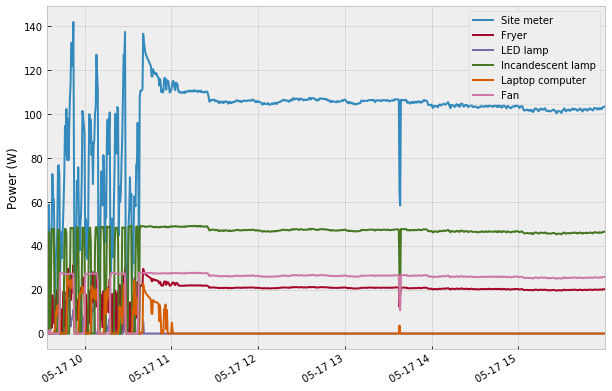

In [118]:
train_elec.plot()
#no hay datos train_elec.submeters().plot()


In [119]:
 #Validación 

valid = DataSet('ualm2.h5')

valid.set_window(start="'2023-05-17 16:00:01", end=" 2023-05-17 17:00:00")

valid_elec=valid.buildings[1].elec

valid_elec.get_timeframe()

TimeFrame(start='2023-05-17 16:00:01+02:00', end='2023-05-17 17:00:00+02:00', empty=False)

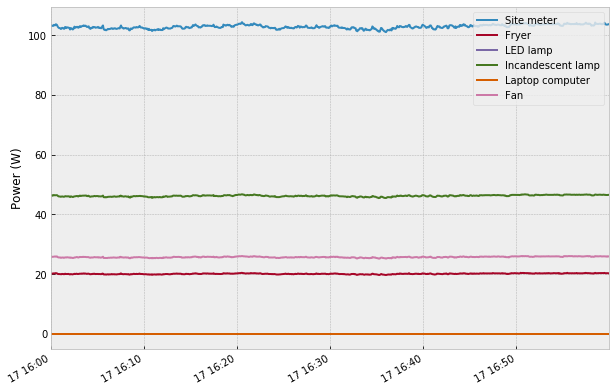

In [120]:
valid_elec.mains().plot()
valid_elec.submeters().plot()

In [121]:
test = DataSet('ualm2.h5') #Pruebas

test.set_window(start=" 2023-05-17 17:00:01", end="2023-05-17 18:37:27")
test_elec=test.buildings[1].elec

test_elec.get_timeframe()

TimeFrame(start='2023-05-17 17:00:01+02:00', end='2023-05-17 18:37:27+02:00', empty=False)

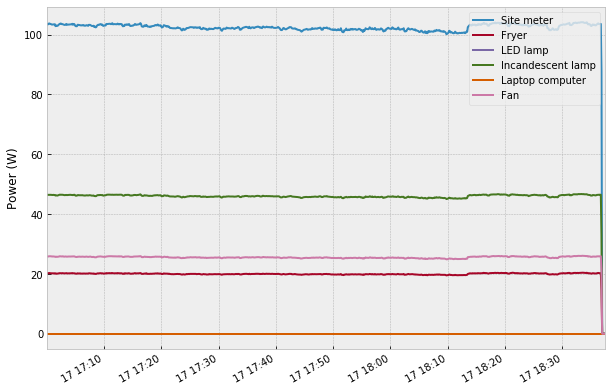

In [122]:
test_elec.mains().plot()
test_elec.submeters().plot()

# PASO 5 ENTRENAMIENTO

In [123]:
#dataset de referencia 
ompm = DataSet('ualm2.h5')

elec=ompm.buildings[1].elec # Todos los medidores

print (elec)

labels = pd.DataFrame({'Instances': list(range(1,7)),
                       'Meters': ['Main', 'Fryer', 'LED Lamp',  'Incandescent lamp','Laptop Computer', 'Fan']})

Meters={}
for x in range(len(labels)): Meters[elec[x+1]]=labels['Meters'][x]

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='fryer', instance=1)])
  ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='LED lamp', instance=1)])
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='incandescent lamp', instance=1)])
  ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='laptop computer', instance=1)])
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
)


In [124]:
#Set para entrenamiento
#dataset de referencia DSUALM
#train = DataSet('ualm2.h5')
#train.set_window(start="2023-05-13 17:22:02", end="2023-05-13 21:08:38")

train_elec = train.buildings[1].elec

#Dispositivos para entrenamiento
train_Devices = train_elec.select(instance=[2,3,4,5,6])
train_Devices

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='fryer', instance=1)])
  ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='LED lamp', instance=1)])
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='incandescent lamp', instance=1)])
  ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='laptop computer', instance=1)])
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
)

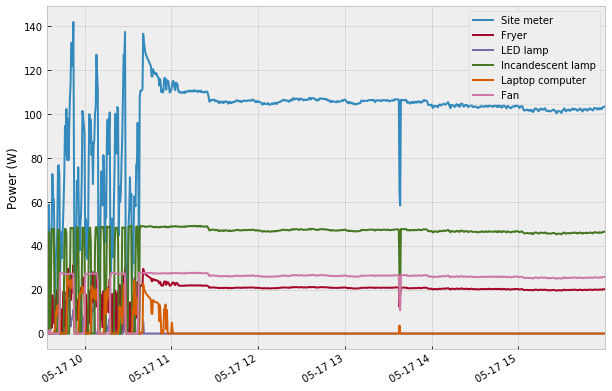

In [125]:
train_elec.plot()

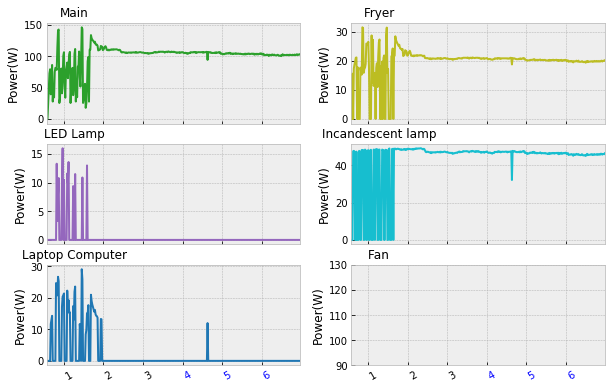

In [126]:
rcParams['figure.figsize'] = (10, 7)

fig, ((ax1, ax2),(ax3, ax4),(ax5, ax6)) = plt.subplots(3, 2, sharex=True,
                                                       gridspec_kw={'hspace': 0.2, 'wspace': 0.2})
#colores
colors=['tab:blue','tab:orange','tab:green','tab:olive','tab:purple','tab:cyan']
m=1
for ax in fig.get_axes(): 
    next(train_elec[m].load(ac_type='active', sample_period=60,
                            resample_kwargs={'how':'first'})).plot(ax=ax, legend=False, color=colors[m-5])   
    ax.set_ylabel('Power(W)')
    ax1.set_ylim(auto=True)
    ax.minorticks_off()
    ax.set_xticklabels(labels=['1','2','3','4','5','6','7','8'], ha ='left')    
    ax.set_title(labels['Meters'][m-1], fontsize=12).set_position([.11, 1])
    c=['k','k','k','b','b','b','k','k']
    [t.set_color(i) for (i,t) in zip(c, ax.xaxis.get_ticklabels())]
    m=m+1

ax6.set_ylim(90,130)   
plt.savefig('./data/images/4.1_Plot_train.svg', bbox_inches='tight', transparent=True)
plt.show()
pass

## Modelos
### co

In [127]:
from nilmtk.legacy.disaggregate import CombinatorialOptimisation
CO=CombinatorialOptimisation() #variable del modelo
CO.train(train_Devices) #entrenamiento del modelo CO


Training model for submeter 'ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='fryer', instance=1)])'
Training model for submeter 'ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='LED lamp', instance=1)])'
Training model for submeter 'ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='incandescent lamp', instance=1)])'
Training model for submeter 'ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='laptop computer', instance=1)])'
Training model for submeter 'ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])'
Done training!


In [128]:
from nilmtk.legacy.disaggregate import FHMM
FHMM=FHMM() #variable del modelo
FHMM.train(train_Devices) #entrenamiento del modelo FHMM
FHMM


Training model for submeter 'ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='fryer', instance=1)])' with 3 states
Training model for submeter 'ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='LED lamp', instance=1)])' with 3 states
Training model for submeter 'ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='incandescent lamp', instance=1)])' with 3 states
Training model for submeter 'ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='laptop computer', instance=1)])' with 3 states
Training model for submeter 'ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])' with 3 states


In [129]:
from nilmtk.legacy.disaggregate import CombinatorialOptimisation, FHMM

dir_models = './data/NILM/Models/'
times = {} #almacena tiempos de ejecución
null={} #diccionario nulo
    
t = []
models={'CO':CombinatorialOptimisation(), 'FHMM':FHMM()}

for model_name, model in models.items():
    print("*"*20 + ' ' + model_name + "*"*20)
    #Entrenamiento
    model.MIN_CHUNK_LENGTH = 1
    import time
    start = time.time()
    model.train(train_Devices,
                num_states_dict={}, #diccionario de estados nulo, por defecto
                ac_type='active', #potencia activa, por defecto
                sample_period=1, #cambio de muestreo
                resample_kwargs={'how':'first'})#método 

    t.append(round(time.time()-start,2)) #tiempo de simulación

    #Guarda modelo
    #model_dir = dir_models + model_name + '_1s_first_model.pickle'
    model_dir = dir_models + model_name + '_1s_first_model.h5'
    print(model_dir)
    output=HDFDataStore(model_dir, 'w')
    #model.export_model(model_dir) 
    #model.save(model_dir)
    
times['1s'] = t #tiempo de simulación
times_t1 = pd.DataFrame(times,index=['CO_first', 'FHMM_first'])
    
print('\n\nDone!')

******************** CO********************
Training model for submeter 'ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='fryer', instance=1)])'
Training model for submeter 'ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='LED lamp', instance=1)])'
Training model for submeter 'ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='incandescent lamp', instance=1)])'
Training model for submeter 'ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='laptop computer', instance=1)])'
Training model for submeter 'ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])'
Done training!
./data/NILM/Models/CO_1s_first_model.h5
******************** FHMM********************
Training model for submeter 'ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='fryer', instance=1)])' with 3 states
Training model for submeter 'Ele

In [130]:
#tiempos de simulación: entrenamiento
times_t1.transpose()

,CO_first,FHMM_first
1s,6.8,10.22


In [131]:
from nilmtk.legacy.disaggregate import CombinatorialOptimisation, FHMM

periods = {'1s':1,'10s':10 , '30s':30, '60s':60, '5min':60*5, '15min':60*15, }

methods = ['mean', 'median']
dir_models = './data/NILM/Models/'
times = {} #almacena tiempos de ejecución
null= {} #diccionario nulo
    
for sp_name, sp in periods.items():
    t = []
    
    for method in methods:
        models={'CO':CombinatorialOptimisation(), 'FHMM':FHMM()}

        for model_name, model in models.items():
            print("*"*20 + ' ' + model_name + ' ' + sp_name+ ' ' + method + "*"*20)
            #Entrenamiento
            model.MIN_CHUNK_LENGTH = 1
            import time
            start = time.time()
            model.train(train_Devices,
                        num_states_dict={ }, #diccionario de estados nulo, por defecto
                        ac_type='active', #potencia activa, por defecto
                        sample_period=sp, #cambio de muestreo
                        resample_kwargs={'how':method}) #método

            t.append(round(time.time()-start,2)) #tiempo de simulación

            #Guarda modelo en formato h5
            #model_dir = dir_models + model_name + '_' + sp_name + '_' + method + '_model.pickle'
            model_dir = dir_models + model_name + '_' + sp_name + '_' + method + '_model.h5'
            print(">>>>>>"+model_dir+"<<<<<<<<")
            output=HDFDataStore(model_dir, 'w')
            #fallaria al exportarlo como model.pickle
            #model.export_model(model_dir) 

    times[sp_name] = t #tiempo de simulación

times_t2 = pd.DataFrame(times,index=['CO_mean', 'FHMM_mean', 'CO_median', 'FHMM_median'])
    
print('\n\nDone!')

******************** CO 1s mean********************
Training model for submeter 'ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='fryer', instance=1)])'
Training model for submeter 'ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='LED lamp', instance=1)])'
Training model for submeter 'ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='incandescent lamp', instance=1)])'
Training model for submeter 'ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='laptop computer', instance=1)])'
Training model for submeter 'ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])'
Done training!
>>>>>>./data/NILM/Models/CO_1s_mean_model.h5<<<<<<<<
******************** FHMM 1s mean********************
Training model for submeter 'ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='fryer', instance=1)])' with 3 states
Tra

Training model for submeter 'ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='LED lamp', instance=1)])'
Training model for submeter 'ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='incandescent lamp', instance=1)])'
Training model for submeter 'ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='laptop computer', instance=1)])'
Training model for submeter 'ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])'
Done training!
>>>>>>./data/NILM/Models/CO_30s_median_model.h5<<<<<<<<
******************** FHMM 30s median********************
Training model for submeter 'ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='fryer', instance=1)])' with 3 states
Training model for submeter 'ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='LED lamp', instance=1)])' with 1 states
Training model for submeter 'Ele

Training model for submeter 'ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='LED lamp', instance=1)])'
Training model for submeter 'ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='incandescent lamp', instance=1)])'
Training model for submeter 'ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='laptop computer', instance=1)])'
Training model for submeter 'ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])'
Done training!
>>>>>>./data/NILM/Models/CO_15min_mean_model.h5<<<<<<<<
******************** FHMM 15min mean********************
Training model for submeter 'ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='fryer', instance=1)])' with 3 states
Training model for submeter 'ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='LED lamp', instance=1)])' with 1 states
Training model for submeter 'Ele

In [132]:
#tiempos de simulación: entrenamiento
times_t2.transpose()

,CO_mean,FHMM_mean,CO_median,FHMM_median
1s,6.62,10.28,6.57,10.37
10s,5.63,6.69,5.77,6.56
30s,5.99,7.67,5.54,7.47
60s,5.26,6.40,5.22,6.70
5min,4.84,6.38,4.91,6.58
15min,4.95,6.47,4.71,6.26


# PASO 6 VALIDACION

In [133]:
#Set para validación
#valid = DataSet('ualm2.h5')

#valid.set_window(start="2023-05-13 21:08:38", end="2023-05-13 22:35:08")

valid_elec = valid.buildings[1].elec

print('Medidor de cabecera para desagregación:')
valid_Main = valid_elec.mains()
print(valid_Main)

print('\nDispositivos para validación de entrenamiento:')
valid_Devices = valid_elec.select(instance=[2,3,4,5,6])
print(valid_Devices)

Medidor de cabecera para desagregación:
ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[])

Dispositivos para validación de entrenamiento:
MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='fryer', instance=1)])
  ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='LED lamp', instance=1)])
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='incandescent lamp', instance=1)])
  ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='laptop computer', instance=1)])
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
)


In [134]:
labels = pd.DataFrame({'Instances': list(range(1,7)),
                       'Meters': ['Main', 'fryer', 'LED Lamp',  'Incandescent lamp','Laptop Computer', 'Fan']})
print ("** Etiquetas ***")

print (labels)

Meters={}
for x in range(len(labels)): Meters[valid_elec[x+1]]=labels['Meters'][x]

** Etiquetas ***
   Instances             Meters
0          1               Main
1          2              fryer
2          3           LED Lamp
3          4  Incandescent lamp
4          5    Laptop Computer
5          6                Fan


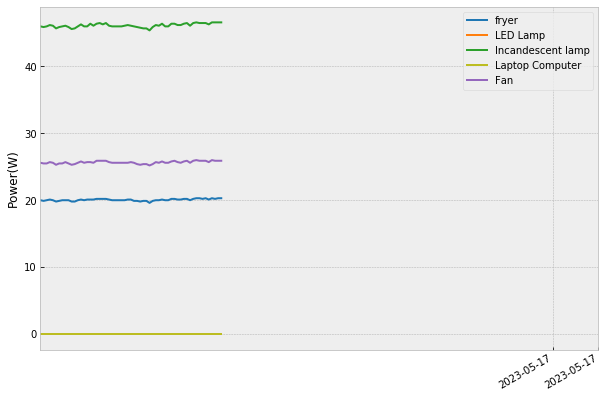

In [135]:
rcParams['figure.figsize'] = (10, 7)


#Validation Interval: Start Time: 2023-05-16 14:45:18+01:00 End Time: 2023-05-16 17:15:23+01:00
t0='2023-05-17 16:00:01'
t1='2023-05-17 16:45:18'
t2='2023-05-17 17:00:00'


ax2 = valid_Devices.dataframe_of_meters(ac_type='active', sample_period=60, resample_kwargs={'how':'first'})[t0:t2].plot()  
#colores
colors=['tab:blue','tab:orange','tab:green','tab:olive','tab:purple']
c=0
for col in colors:    
    ax2.get_lines()[c].set_color(col)
    c=c+1   
ax2.legend(list(Meters.values())[1:6])
ax2.minorticks_off()
ax2.set(xticks=(t1, t2))
#ax2.set_xticklabels(labels=['10-11','11-11'], ha='left', rotation=0)    
ax2.set_ylabel('Power(W)')
plt.savefig('./data/images/5.2_Plot_valid_devices.svg', bbox_inches='tight', transparent=True)
pass

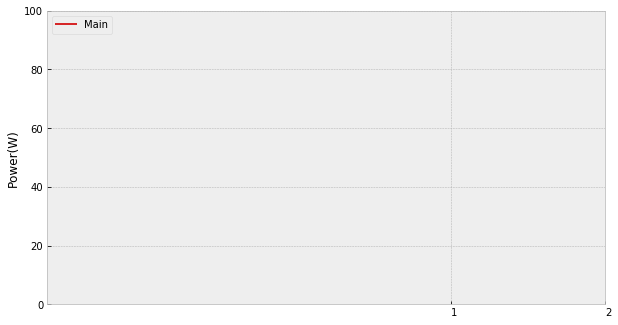

In [136]:
rcParams['figure.figsize'] = (10, 6)

ax1 = next(valid_Main.load(ac_type='active', sample_period=60, resample_kwargs={'how':'first'}))[t0:t2].plot(c='tab:red') 
ax1.legend(['Main'], loc='upper left') #etiquetas
ax1.minorticks_off()
ax1.set(xticks=(t0, t1))
ax1.set_xticklabels(labels=['1','2'], ha='left', rotation=0)    
ax1.set_ylabel('Power(W)')
ax1.set_ylim(0,100)
plt.savefig('./data/images/5.1_Plot_valid_main.svg', bbox_inches='tight', transparent=True)
pass

### Desagregación para validación

La desagregación de los datos de validación se realiza utilizando los datos del MeterGroup valid_Main, el cual contiene el ElecMeter de los datos agregados del sistema eléctrico. Así, el medidor principal  será el dato de entrada para cada uno de los modelos de desagregación entrenados.

In [137]:
#train = DataSet('ualm2.h5')
#train.set_window(start="2023-05-13 17:22:02", end="2023-05-13 21:08:38")

train_elec = train.buildings[1].elec

#Dispositivos para entrenamiento
train_Devices = train_elec.select(instance=[2,3,4,5,6])
train_Devices

from nilmtk.legacy.disaggregate import CombinatorialOptimisation, FHMM

periods = {'1s':1, '10s':10 , '30s':30, '60s':60, '5min':60*5, '10min':60*10, '15min':60*15, '30min':60*30}
methods = ['mean', 'median','first']  # cambiar abajo tambien

dir_models = './data/NILM/Models/'
times = {} #almacena tiempos de ejecución
null= {} #diccionario nulo
    
for sp_name, sp in periods.items():
    t = []
    
    for method in methods:
        models={'CO':CombinatorialOptimisation(), 'FHMM':FHMM()}

        for model_name, model in models.items():
            print("*"*20 + ' ' + model_name + ' ' + sp_name+ ' ' + method + "*"*20)
            #Entrenamiento
            model.MIN_CHUNK_LENGTH = 1
            import time
            start = time.time()
            model.train(train_Devices,
                        num_states_dict={ }, #diccionario de estados nulo, por defecto
                        ac_type='active', #potencia activa, por defecto
                        sample_period=sp, #cambio de muestreo
                        resample_kwargs={'how':'mean'}) #método

            t.append(round(time.time()-start,2)) #tiempo de simulación

                        
            model_dir=data_dir+'NILM/Results/'+model_name+'_'+sp_name+'_'+method+'_pred.h5'
            output=HDFDataStore(model_dir, 'w')
            print ('Fichero del modelo:',model_dir)
            
            model.disaggregate(valid_Main, output, sample_period=sp, resample_kwargs={'how':method}, ac_type='active')
            output.close()
            
            
    times[sp_name] = t #tiempo de simulación
   
    
 
times_v = pd.DataFrame(times,index=['CO_mean', 'FHMM_mean', 'CO_median', 'FHMM_median','CO_first', 'FHMM_first'])
    
    
print('\n\nDone!')

******************** CO 1s mean********************
Training model for submeter 'ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='fryer', instance=1)])'
Training model for submeter 'ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='LED lamp', instance=1)])'
Training model for submeter 'ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='incandescent lamp', instance=1)])'
Training model for submeter 'ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='laptop computer', instance=1)])'
Training model for submeter 'ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])'
Done training!
Fichero del modelo: ./data/NILM/Results/CO_1s_mean_pred.h5
Estimating power demand for 'ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='fryer', instance=1)])'
Estimating power demand for 'ElecMeter(instance=3, building=1, da

Training model for submeter 'ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='fryer', instance=1)])' with 3 states
Training model for submeter 'ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='LED lamp', instance=1)])' with 3 states
Training model for submeter 'ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='incandescent lamp', instance=1)])' with 3 states
Training model for submeter 'ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='laptop computer', instance=1)])' with 3 states
Training model for submeter 'ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])' with 3 states
Fichero del modelo: ./data/NILM/Results/FHMM_10s_mean_pred.h5
******************** CO 10s median********************
Training model for submeter 'ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='fryer', instance=1)])'
Trai

Training model for submeter 'ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='laptop computer', instance=1)])'
Training model for submeter 'ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])'
Done training!
Fichero del modelo: ./data/NILM/Results/CO_30s_median_pred.h5
Estimating power demand for 'ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='fryer', instance=1)])'
Estimating power demand for 'ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='LED lamp', instance=1)])'
Estimating power demand for 'ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='incandescent lamp', instance=1)])'
Estimating power demand for 'ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='laptop computer', instance=1)])'
Estimating power demand for 'ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(ty

Training model for submeter 'ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='LED lamp', instance=1)])' with 1 states
Training model for submeter 'ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='incandescent lamp', instance=1)])' with 3 states
Training model for submeter 'ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='laptop computer', instance=1)])' with 3 states
Training model for submeter 'ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])' with 3 states
Fichero del modelo: ./data/NILM/Results/FHMM_60s_median_pred.h5
******************** CO 60s first********************
Training model for submeter 'ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='fryer', instance=1)])'
Training model for submeter 'ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='LED lamp', instance=1)])'
Training model

Training model for submeter 'ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='laptop computer', instance=1)])'
Training model for submeter 'ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])'
Done training!
Fichero del modelo: ./data/NILM/Results/CO_5min_first_pred.h5
Estimating power demand for 'ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='fryer', instance=1)])'
Estimating power demand for 'ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='LED lamp', instance=1)])'
Estimating power demand for 'ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='incandescent lamp', instance=1)])'
Estimating power demand for 'ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='laptop computer', instance=1)])'
Estimating power demand for 'ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(ty

Training model for submeter 'ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='LED lamp', instance=1)])' with 1 states
Training model for submeter 'ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='incandescent lamp', instance=1)])' with 3 states
Training model for submeter 'ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='laptop computer', instance=1)])' with 1 states
Training model for submeter 'ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])' with 3 states
Fichero del modelo: ./data/NILM/Results/FHMM_10min_first_pred.h5
******************** CO 15min mean********************
Training model for submeter 'ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='fryer', instance=1)])'
Training model for submeter 'ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='LED lamp', instance=1)])'
Training mod

Training model for submeter 'ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='laptop computer', instance=1)])'
Training model for submeter 'ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])'
Done training!
Fichero del modelo: ./data/NILM/Results/CO_30min_mean_pred.h5
Estimating power demand for 'ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='fryer', instance=1)])'
Estimating power demand for 'ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='LED lamp', instance=1)])'
Estimating power demand for 'ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='incandescent lamp', instance=1)])'
Estimating power demand for 'ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='laptop computer', instance=1)])'
Estimating power demand for 'ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(ty

In [138]:
times_v.transpose()

,CO_mean,FHMM_mean,CO_median,FHMM_median,CO_first,FHMM_first
1s,6.72,10.19,7.14,10.41,6.43,10.08
10s,5.48,6.61,5.59,6.75,5.53,6.61
30s,5.36,7.26,5.46,7.26,5.37,7.13
60s,4.93,8.45,11.13,7.33,6.24,8.52
5min,5.51,12.98,13.84,23.00,14.50,20.01
10min,11.00,20.98,12.31,8.66,5.44,7.97
15min,6.17,8.89,5.68,6.79,5.76,10.64
30min,10.40,18.93,9.19,12.21,7.77,10.06


### Comparacion de resultados

In [139]:
Meters

{ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[]): 'Main',
 ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='fryer', instance=1)]): 'fryer',
 ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='LED lamp', instance=1)]): 'LED Lamp',
 ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='incandescent lamp', instance=1)]): 'Incandescent lamp',
 ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='laptop computer', instance=1)]): 'Laptop Computer',
 ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)]): 'Fan'}

## PASO 7 DESAGRAGAION

In [140]:
#test = DataSet('ualm2.h5') #Pruebas

#test.set_window(start="2023-05-13 22:35:08", end="2023-05-13 23:43:15")

test_elec = test.buildings[1].elec


test_Main=test_elec.mains() #medidor principal de cabecera
test_Main

ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[])

In [141]:
test_elec

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='fryer', instance=1)])
  ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='LED lamp', instance=1)])
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='incandescent lamp', instance=1)])
  ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='laptop computer', instance=1)])
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
)

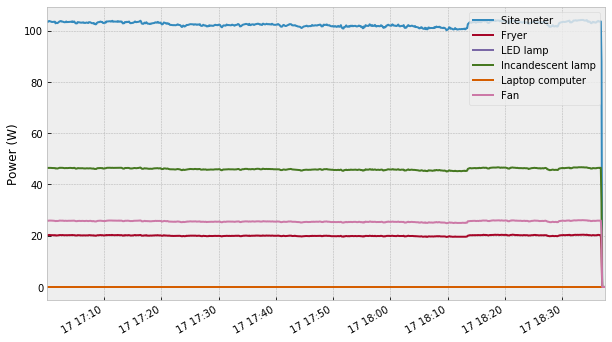

In [142]:
test_elec.plot()

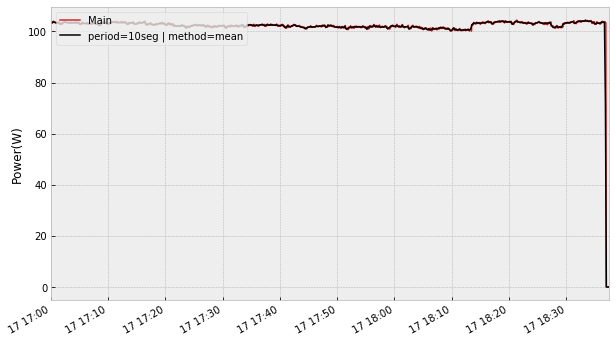

In [143]:
rcParams['figure.figsize'] = (10, 6)

ax1 = next(test_Main.load(ac_type='active', sample_period=1, resample_kwargs={'how':'first'})).plot(c='tab:red', lw=1.5) 
next(test_Main.load(ac_type='active', sample_period=10, resample_kwargs={'how':'mean'})).plot(ax=ax1, c='k', lw=1.5) 

ax1.legend([('Main'),'period=10seg | method=mean'], loc='upper left') #etiquetas
ax1.minorticks_off()   
ax1.set_ylabel('Power(W)')
    
plt.savefig('./data/images/6.1_Plot_test_30seg.svg', bbox_inches='tight', transparent=True)
pass

# DESAGREGACION

In [144]:
from nilmtk.legacy.disaggregate import FHMM
from nilmtk import HDFDataStore


#train = DataSet('ualm2.h5')
#train.set_window(start="2023-05-13 17:22:02", end="2023-05-13 21:08:38")

train_elec = train.buildings[1].elec

#Dispositivos para entrenamiento
train_Devices = train_elec.select(instance=[2,3,4,5,6])
train_Devices


#Set para validación
#valid = DataSet('ualm2.h5')
#valid.set_window(start="2023-05-13 21:08:38", end="2023-05-13 22:35:08")



valid_elec = valid.buildings[1].elec

print('Medidor de cabecera para desagregación:')
valid_Main = valid_elec.mains()
print(valid_Main)

print('\nDispositivos para validación de entrenamiento:')
valid_Devices = valid_elec.select(instance=[2,3,4,5,6])
print(valid_Devices)

from nilmtk.legacy.disaggregate import CombinatorialOptimisation, FHMM

#probad  10seg y mean con CO 58.7  a 28,9
#probad  15min nmedian CO 58,7a 28,9               
#probad  10seg first  CO 58,7 a 28,9

#periods = { '30seg':30} #old
#periods = {'10seg':10}
periods = { '60seg':60}  ## the best results  with first and algorithm CO in respect of the predictions
#periods = { '5min':300}
#periods = { '10min':600}
#periods = { '15min':900}
#periods = { '30min':1800}


methods = [ 'median']
#methods = [ 'first'] #old
#methods = [ 'mean']

times = {}

data_dir = './data/'
times = {} #almacena tiempos de ejecución
null={} #diccionario nulo


for sp_name, sp in periods.items():
    t = []
    for method in methods:
       # models={'FHMM':FHMM()} #old
        models={'CO':CombinatorialOptimisation()}
        for model_name, model in models.items():
            model.MIN_CHUNK_LENGTH = 1   
            print("*"*20 + ' ' + model_name + ' ' + sp_name+ ' ' + method + "*"*20)   
            import time
            start = time.time()
            model.train(train_Devices,
                num_states_dict={}, #diccionario de estados nulo, por defecto
                ac_type='active', #potencia activa, por defecto
                sample_period=30, #cambio de muestreo
                resample_kwargs={'how':'mean'})#método
                

            t.append(round(time.time()-start,2)) #tiempo de simulación

            #Guardamos el  modelo entrenado
            #Falla  al exprtarlo como model.pickle asi que lo salvamos en formato h5
            #model_dir = dir_models + model_name + '_1s_first_model.pickle'
            #print(model_dir)
            #model.export_model(model_dir) 
            output=HDFDataStore(data_dir+'NILM/Results/test_results.h5', 'w')
            
            model.disaggregate(valid_Main, output, sample_period=sp, resample_kwargs={'how':method}, ac_type='active')
            output.close()
            end = time.time()-start
            t.append(round(end,2))  

    times[sp_name] = t

  
            
    
print('\n\nDone!')



Medidor de cabecera para desagregación:
ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[])

Dispositivos para validación de entrenamiento:
MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='fryer', instance=1)])
  ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='LED lamp', instance=1)])
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='incandescent lamp', instance=1)])
  ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='laptop computer', instance=1)])
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
)
******************** CO 60seg median********************
Training model for submeter 'ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='fryer', instance=1)])'
Training model for submeter 'ElecMeter(instance=3, building=1, dataset='DSUAL', applian

In [145]:
file=open (data_dir+'NILM/Results/test_results.h5')

file.close()

In [146]:
results=DataSet(data_dir+'NILM/Results/test_results.h5')
results_elec=results.buildings[1].elec # Todos los medidores
results_Main=results_elec.mains() #medidor de cabecera
results_Devices=results_elec.submeters() #predicciones

results_elec

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='CO', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='CO', appliances=[Appliance(type='fryer', instance=1)])
  ElecMeter(instance=3, building=1, dataset='CO', appliances=[Appliance(type='LED lamp', instance=1)])
  ElecMeter(instance=4, building=1, dataset='CO', appliances=[Appliance(type='incandescent lamp', instance=1)])
  ElecMeter(instance=5, building=1, dataset='CO', appliances=[Appliance(type='laptop computer', instance=1)])
  ElecMeter(instance=6, building=1, dataset='CO', appliances=[Appliance(type='fan', instance=1)])
)

In [147]:
#METADATOS

In [148]:
print_dict(results.metadata)

In [149]:
print_dict(results.buildings[1].metadata)

In [150]:
print_dict(results_elec[1].get_metadata())

# ANALISIS GRAFICO

6/6 ElecMeter(instance=6, building=1, dataset='CO', appliances=[Appliance(type='fan', instance=1)])nstance=1)])])

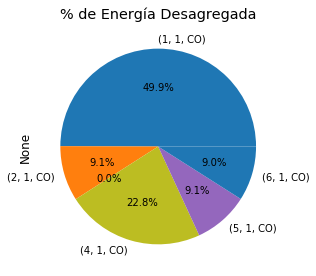

In [151]:
d1=results_elec.fraction_per_meter()
ax1=d1.plot(autopct=lambda p:'{:.1f}%'.format(p), kind='pie',
           # labels=labels[1:]+list(['Others']),
            figsize=(4.5,4.5),
            colors=colors)
#ax1.set(ylabel="")
ax1.set(title='% de Energía Desagregada')
#guarda gráfico
plt.savefig('./data/images/6.2_Plot_results_1.1.svg', bbox_inches='tight', transparent=True)

5/5 ElecMeter(instance=6, building=1, dataset='CO', appliances=[Appliance(type='fan', instance=1)])nstance=1)])]))])

[Text(0.5, 1.0, 'Pred')]

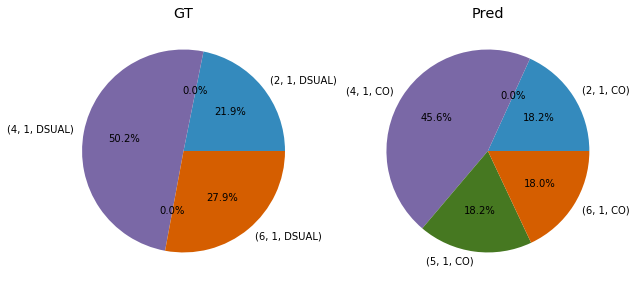

In [152]:
#rcParams['figure.figsize'] = (58, 55)
fig, (ax1, ax2) = plt.subplots(1, 2)
test_elec.select(instance=[2,3,4,5,6]).fraction_per_meter().plot(ax=ax1, autopct=lambda p:'{:.1f}%'.format(p), kind='pie')
#val_elec.select(instance=[2,3,4,5,6]).fraction_per_meter().plot(ax=ax1, autopct=lambda p:'{:.1f}%'.format(p), kind='pie')

results_elec.select(instance=[2,3,4,5,6]).fraction_per_meter().plot(ax=ax2, autopct=lambda p:'{:.1f}%'.format(p), kind='pie')
ax1.set(ylabel="")
ax1.set(title='GT')
ax2.set(ylabel="")
ax2.set(title='Pred')

(0, 500)

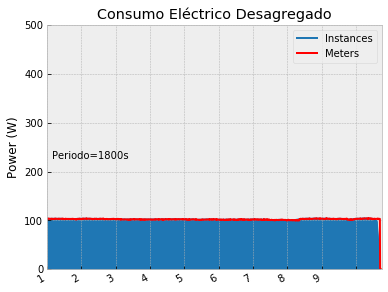

In [153]:

rcParams['figure.figsize'] = (6, 5)

df_d=test_elec.select(instance=[1]).dataframe_of_meters(ac_type='active')
ax1 = df_d.plot(kind='area',color=colors) 
next(test_elec[1].load(ac_type='active')).plot(ax=ax1, c='r')

#etiquetas
ax1.legend(labels[1:7])
ax1.set(title='Consumo Eléctrico Desagregado')
ax1.set_xticklabels(['1','2', '3', '4','5','6','7', '8','9'])
ax1.set(ylabel='Power (W)')
ax1.annotate("Periodo=1800s", xycoords='axes pixels', xy=(5, 110))
ax1.set_ylim(0,500)

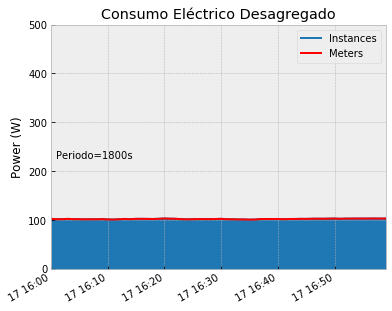

In [154]:
rcParams['figure.figsize'] = (6, 5)

df_d=results_elec.select(instance=[1]).dataframe_of_meters(ac_type='active')
ax1 = df_d.plot(kind='area',color=colors) 
next(results_elec[1].load()).plot(ax=ax1, c='r')

#etiquetas
ax1.legend(labels[1:7])
ax1.set(title='Consumo Eléctrico Desagregado')
#ax1.set_xticklabels(['1','2', '3', '4','5','6','7', '8','9'])
ax1.set(ylabel='Power (W)')
ax1.annotate("Periodo=1800s", xycoords='axes pixels', xy=(5, 110))
ax1.set_ylim(0,500)
#guarda gráfico
plt.savefig('./data/images/6.3_Plot_results_1.2.svg', bbox_inches='tight', transparent=True)
pass

In [155]:
#Energía de dispositivos
e_d=round(results_elec.energy_per_meter().transpose()['active'][1:],1)
print('\n\nEnergía de Dispositivos:')
print(e_d)

#Energía total de dispositivos
e_t=round(sum(e_d),2)
print('\nEnergía Total Dispositivos: '+str(e_t))

#energía medida por Mains_RST
e_m=round(results_elec.mains().total_energy(),1)
print('\nEnergía Main Principal: '+str(e_m[0]))

#energía no medida
print('\nEnergía No medida: '+str(e_m[0]-e_t))

6/6 ElecMeter(instance=6, building=1, dataset='CO', appliances=[Appliance(type='fan', instance=1)])nstance=1)])])

Energía de Dispositivos:
(2, 1, CO)    0.0
(3, 1, CO)    0.0
(4, 1, CO)    0.0
(5, 1, CO)    0.0
(6, 1, CO)    0.0
Name: active, dtype: float64

Energía Total Dispositivos: 0.0

Energía Main Principal: 0.1

Energía No medida: 0.1


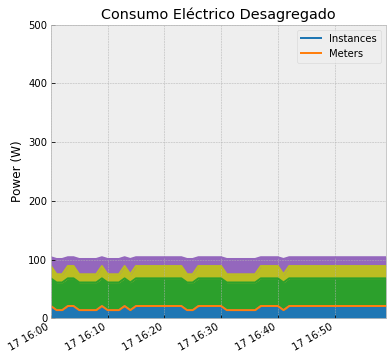

In [156]:
rcParams['figure.figsize'] = (6, 6)

df_d=results_elec.select(instance=[2,3,4,5,6]).dataframe_of_meters(ac_type='active')

ax1 = df_d.plot(kind='area',color=colors)   
#etiquetas
ax1.legend(labels[1:7])
ax1.set(title='Consumo Eléctrico Desagregado')
#ax1.set_xticklabels(['2-Feb','10:00', '10:30', '11:00','11:30','12:00','12:30', '13:00','13:15'])
ax1.set(ylabel='Power (W)')
#ax1.annotate("Periodo=30s", xycoords='axes pixels', xy=(5, 110))
ax1.set_ylim(0,500)
#guarda gráfico
plt.savefig('./data/images/6.3_Plot_results_1.2.svg', bbox_inches='tight', transparent=True)

# PASO 8 METRICAS

In [157]:
#Librerías
from nilmtk.metrics import f1_score
from nilmtk.metrics import error_in_assigned_energy
from nilmtk.metrics import mean_normalized_error_power
from nilmtk.metrics import rms_error_power
from nilmtk.metrics import fraction_energy_assigned_correctly

In [158]:
labels = pd.DataFrame({'Instances': list(range(1,7)),
                       'Meters': ['Main', 'Fryer', 'LED Lamp',  'Incandescent lamp','Laptop Computer', 'Fan']})

#Set para validación
#valid = DataSet('ualm2.h5')
#valid.set_window(start="2023-05-13 21:08:38", end="2023-05-13 22:35:08")
valid_elec = valid.buildings[1].elec

print('Medidor de cabecera para desagregación:')
valid_Main = valid_elec.mains()
print(valid_Main)

print('\nDispositivos para validación de entrenamiento:')
valid_Devices = valid_elec.select(instance=[2,3,4,5,6])
print(valid_Devices)

#dataset=DataSet(data_dir+'NILM/Results/CO_10s_mean_pred.h5')

#dataset=DataSet(data_dir+'NILM/Results/CO_10s_first_pred.h5')

#dataset=DataSet(data_dir+'NILM/Results/CO_10s_median_pred.h5') #the best
#	Fryer	LED Lamp	Incandescent lamp	Laptop Computer	Fan
#F1	0.763	0.000	0.999	0.000	0.998
#EAE	0.000	0.000	0.000	0.000	0.000
#MNEAP	0.638	inf	0.128	820.584	0.218
#RMSE	14.462	11.795	11.917	17.111	8.266


#dataset=DataSet(data_dir+'NILM/Results/CO_30s_median_pred.h5') 
#Fryer	LED Lamp	Incandescent lamp	Laptop Computer	Fan
#F1	0.955	0.000	0.998	0.000	0.986
#EAE	0.007	0.009	0.007	0.043	0.008
#MNEAP	0.219	inf	0.089	923.533	0.150
#RMSE	7.071	7.038	9.607	17.738	5.707



dataset=DataSet(data_dir+'NILM/Results/FHMM_60s_median_pred.h5') #el mejor
#	Fryer	LED Lamp	Incandescent lamp	Laptop Computer	Fan
#F1	0.997	0.0	0.993	0.00	0.993
#EAE	0.000	0.0	0.000	0.00	0.000
#MNEAP	0.019	inf	0.020	409.51	0.039
#RMSE	0.559	1.0	1.976	9.97	1.477

#dataset=DataSet(data_dir+'NILM/Results/FHMM_5min_median_pred.h5')
#	Fryer	LED Lamp	Incandescent lamp	Laptop Computer	Fan
#F1	0.983	0.0	0.983	0.000	0.983
#EAE	0.000	0.0	0.000	0.000	0.000
#MNEAP	0.067	inf	0.022	304.955	0.023
#RMSE	1.395	1.0	1.725	4.984	0.651


#dataset=DataSet(data_dir+'NILM/Results/CO_60s_median_pred.h5') 
#	Fryer	LED Lamp	Incandescent lamp	Laptop Computer	Fan
#F1	0.997	0.0	0.993	0.000	0.997
#EAE	0.000	0.0	0.000	0.000	0.000
#MNEAP	0.319	NaN	0.020	1058.598	0.425
#RMSE	6.608	0.0	1.976	25.792	11.289

#dataset=DataSet(data_dir+'NILM/Results/CO_5min_median_pred.h5') 
#	Fryer	LED Lamp	Incandescent lamp	Laptop Computer	Fan
#F1	0.983	0.0	0.983	0.00	0.983
#EAE	0.000	0.0	0.000	0.00	0.000
#MNEAP	0.067	NaN	0.019	1.00	0.026
#RMSE	1.395	0.0	1.189	0.09	0.819

#dataset=DataSet(data_dir+'NILM/Results/CO_10min_median_pred.h5') 
#	Fryer	LED Lamp	Incandescent lamp	Laptop Computer	Fan
#F1	0.966	0.0	0.966	0.000	0.966
#EAE	0.003	0.0	0.007	0.000	0.002
#MNEAP	0.020	NaN	0.022	1.000	0.019
#RMSE	0.484	0.0	1.457	0.127	0.651

#dataset=DataSet(data_dir+'NILM/Results/CO_15min_median_pred.h5') 
#	Fryer	LED Lamp	Incandescent lamp	Laptop Computer	Fan
#F1	0.947	0.0	0.947	0.000	0.00
#EAE	0.000	0.0	0.000	0.000	0.00
#MNEAP	0.018	NaN	0.019	1.000	1.00
#RMSE	0.404	0.0	0.996	0.049	26.33

predictions=dataset.buildings[1].elec.submeters()

index = list(labels['Meters'][1:6])
met = []
e = []


#Metricas
f1 = {}; eae = {}; feac = {}; mneap = {}; rmse = {};

f1['F1'] = f1_score(predictions, valid_Devices)

EAE = error_in_assigned_energy(predictions, valid_Devices)

for x in range(len(EAE)): e.append(EAE.iloc[x][0])
eae['EAE'] = e
#da error esta medida AttributeError: 'tuple' object has no attribute 'instance'
#feac['FEAC'] = np.ones(6)*(fraction_energy_assigned_correctly(predictions, valid_Devices))
#feac['FEAC'] = np.ones(6)*(fraction_energy_assigned_correctly(predictions, valid_Devices))
mneap['MNEAP'] = mean_normalized_error_power(predictions, valid_Devices)
rmse['RMSE'] = rms_error_power(predictions, valid_Devices)
met.append(pd.concat([pd.DataFrame(feac, index=valid_Devices.instance()),
                      pd.DataFrame(f1),
                      pd.DataFrame(eae, index=valid_Devices.instance()),
                      pd.DataFrame(mneap),
                      pd.DataFrame(rmse)],
                     axis=1).set_index(pd.Index(index)))

dataset.store.close()       
print('\n\nDone!')
metrics=met[0].transpose().round(3)
metrics

Medidor de cabecera para desagregación:
ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[])

Dispositivos para validación de entrenamiento:
MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='fryer', instance=1)])
  ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='LED lamp', instance=1)])
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='incandescent lamp', instance=1)])
  ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='laptop computer', instance=1)])
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
)


Done!


,Fryer,LED Lamp,Incandescent lamp,Laptop Computer,Fan
F1,1.000,0.0,1.000,0.0,0.991
EAE,0.000,0.0,0.000,0.0,0.000
MNEAP,0.447,NaN,0.021,inf,0.039
RMSE,9.005,0.0,1.487,16.0,3.804


In [159]:
gt=valid_elec.dataframe_of_meters(ac_type='active', sample_period=30, resample_kwargs={'how':'first'})

labels = pd.DataFrame({'Instances': list(range(1,7)),'Meters': ['Main', 'Fryer', 'LED Lamp',  'Incandescent lamp','Laptop Computer','Fan']})
                       
Meters={}
for x in range(len(labels)): Meters[valid_elec[x+1]]=labels['Meters'][x]
    
   
    
#resultados de predicción modelo CO 30s
CO_60s_median=DataSet(data_dir+'NILM/Results/CO_60s_median_pred.h5')
elec_CO_60s_median=CO_60s_median.buildings[1].elec

#resultados de predicción modelo FHMM 30s
FHMM_60s_median=DataSet(data_dir+'NILM/Results/FHMM_60s_median_pred.h5')
elec_FHMM_60s_median=FHMM_60s_median.buildings[1].elec    
    
    

gt.columns=list(Meters.values())
pred_CO=elec_CO_60s_median.dataframe_of_meters(ac_type='active')

pred_CO.columns=[list(Meters.values())[0]]+list(Meters.values())[1:6]

pred_FHMM=elec_FHMM_60s_median.dataframe_of_meters(ac_type='active')

pred_FHMM.columns=[list(Meters.values())[0]]+list(Meters.values())[1:6]

## f1

In [160]:
pd.DataFrame(metrics.loc['F1']).transpose()*100

,Fryer,LED Lamp,Incandescent lamp,Laptop Computer,Fan
F1,100.0,0.0,100.0,0.0,99.1


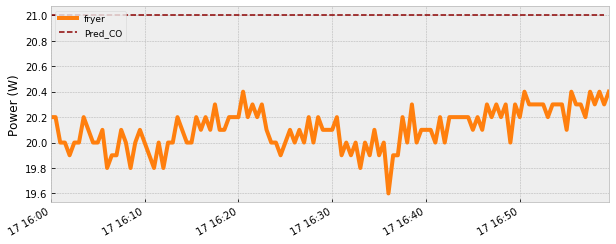

In [161]:
rcParams['figure.figsize'] = (10, 4)

fig, ax1 = plt.subplots();
ax1=gt['Fryer'].plot(lw=4, c='tab:orange')
pred_CO['Fryer'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['fryer','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylabel('Power (W)')

plt.savefig('./data/images/5.5_F1_CO_30s.svg', bbox_inches='tight', transparent=True)
pass

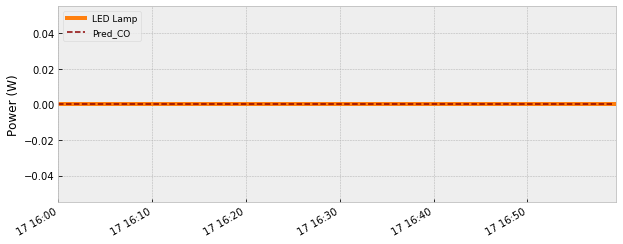

In [162]:
rcParams['figure.figsize'] = (10, 4)

fig, ax1 = plt.subplots();
ax1=gt['LED Lamp'].plot(lw=4, c='tab:orange')
pred_CO['LED Lamp'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['LED Lamp','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylabel('Power (W)')
#ax1.annotate('TP', xy=(250, 188), xycoords='figure points', xytext=(285, 210), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))
#ax1.annotate('TN', xy=(320, 38), xycoords='figure points', xytext=(400, 70), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))
#ax1.annotate('FN', xy=(300, 38), xycoords='figure points', xytext=(530, 70), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))
#ax1.annotate('FP', xy=(187, 188), xycoords='figure points', xytext=(220, 210), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))
plt.savefig('./data/images/5.5_F1_CO_60s.svg', bbox_inches='tight', transparent=True)
pass

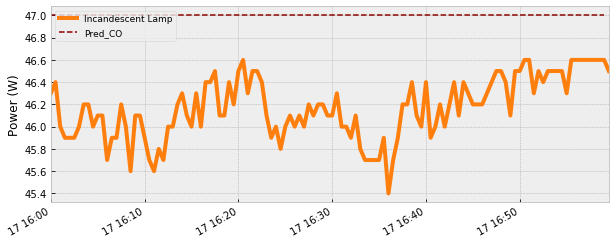

In [163]:
rcParams['figure.figsize'] = (10, 4)

fig, ax1 = plt.subplots();
ax1=gt['Incandescent lamp'].plot(lw=4, c='tab:orange')
pred_CO['Incandescent lamp'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['Incandescent Lamp','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylabel('Power (W)')
#ax1.annotate('TP', xy=(250, 188), xycoords='figure points', xytext=(285, 210), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))
#ax1.annotate('TN', xy=(320, 38), xycoords='figure points', xytext=(400, 70), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))
#ax1.annotate('FN', xy=(300, 38), xycoords='figure points', xytext=(530, 70), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))
#ax1.annotate('FP', xy=(187, 188), xycoords='figure points', xytext=(220, 210), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))
plt.savefig('./data/images/5.5_F1_CO_60s.svg', bbox_inches='tight', transparent=True)
pass

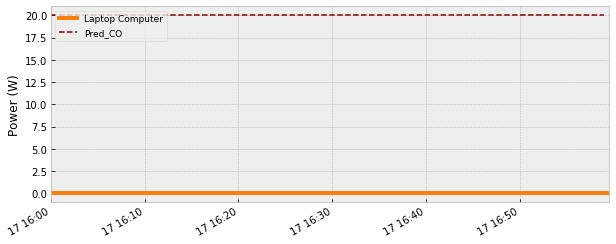

In [164]:
rcParams['figure.figsize'] = (10, 4)

fig, ax1 = plt.subplots();
ax1=gt['Laptop Computer'].plot(lw=4, c='tab:orange')
pred_CO['Laptop Computer'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['Laptop Computer','Pred_CO'], fontsize=9, loc='upper left', ncol=1)

ax1.set_ylabel('Power (W)')
plt.savefig('./data/images/5.5_F1_CO_60s.svg', bbox_inches='tight', transparent=True)
pass

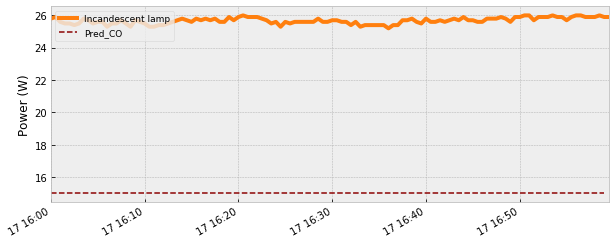

In [165]:
rcParams['figure.figsize'] = (10, 4)
fig, ax1 = plt.subplots();
ax1=gt['Fan'].plot(lw=4, c='tab:orange')
pred_CO['Fan'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['Incandescent lamp','Pred_CO'], fontsize=9, loc='upper left', ncol=1)


ax1.set_ylabel('Power (W)')

plt.savefig('./data/images/5.5_F1_CO_60s.svg', bbox_inches='tight', transparent=True)
pass

## EAE

In [166]:
round(pd.DataFrame(metrics.loc['EAE']).transpose(),2)

,Fryer,LED Lamp,Incandescent lamp,Laptop Computer,Fan
EAE,0.0,0.0,0.0,0.0,0.0


In [167]:
predictions_Devices=elec_CO_60s_median.submeters()
e1=predictions_Devices[5].total_energy()[0]
e2=valid_Devices[5].total_energy()[0]
eae=round(abs(e1-e2),2)

pd.DataFrame([e1,e2,eae], columns=['kWh'], index=['Energy_pred','Energy_GT','EAE'])

,kWh
Energy_pred,0.018433
Energy_GT,0.000000
EAE,0.020000


## MENEAP

In [168]:
round(pd.DataFrame(metrics.loc['MNEAP']).transpose(),2)

,Fryer,LED Lamp,Incandescent lamp,Laptop Computer,Fan
MNEAP,0.45,NaN,0.02,inf,0.04


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


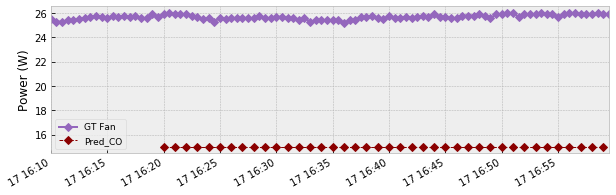

In [169]:
rcParams['figure.figsize'] = (10, 3)
fig, ax1 = plt.subplots();

#umbrales de potencia
a1=[20,1250]

gt['Fan'][a1[0]:a1[1]].plot(ax=ax1, lw=2, c='tab:purple', marker="D")
pred_CO['Fan'][a1[0]:a1[1]].plot(ax=ax1, c='darkred', lw=1, ls='--', marker="D")

ax1.minorticks_off()
ax1.set_ylabel('Power (W)')
ax1.legend(labels=['GT Fan','Pred_CO'], fontsize=9, ncol=1)

err= abs(round((gt['Fan'][a1[0]:a1[1]]-pred_CO['Fan'][a1[0]:a1[1]])[1:6],1))

aux=40
i=0
for e in err:
    ax1.annotate((str(err[i])+'W'), xy=(aux, 140+(abs(err[i]))*0.2), xycoords='axes points', size=10)
    aux=aux+63
    i=i+1



#plt.savefig('./data/images/5.6_MNEAP_CO_30s.svg', bbox_inches='tight', transparent=True)
pass

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


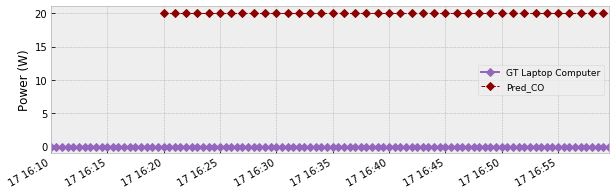

In [170]:
rcParams['figure.figsize'] = (10, 3)
fig, ax1 = plt.subplots();

#umbrales de potencia
a1=[20,1250]

gt['Laptop Computer'][a1[0]:a1[1]].plot(ax=ax1, lw=2, c='tab:purple', marker="D")
pred_CO['Laptop Computer'][a1[0]:a1[1]].plot(ax=ax1, c='darkred', lw=1, ls='--', marker="D")

ax1.minorticks_off()
ax1.set_ylabel('Power (W)')
ax1.legend(labels=['GT Laptop Computer','Pred_CO'], fontsize=9, ncol=1)

err= abs(round((gt['Laptop Computer'][a1[0]:a1[1]]-pred_CO['Laptop Computer'][a1[0]:a1[1]])[1:6],1))

aux=40
i=0
for e in err:
    ax1.annotate((str(err[i])+'W'), xy=(aux, 140+(abs(err[i]))*0.2), xycoords='axes points', size=10)
    aux=aux+63
    i=i+1



#plt.savefig('./data/images/5.6_MNEAP_CO_30s.svg', bbox_inches='tight', transparent=True)
pass

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


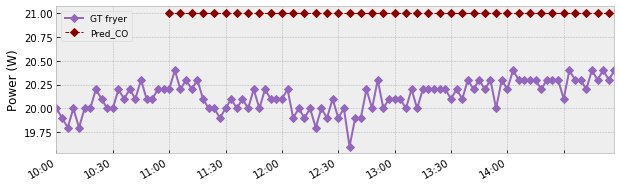

In [171]:
rcParams['figure.figsize'] = (10, 3)
fig, ax1 = plt.subplots();

#umbrales de potencia
a1=[20,1250]

gt['Fryer'][a1[0]:a1[1]].plot(ax=ax1, lw=2, c='tab:purple', marker="D")
pred_CO['Fryer'][a1[0]:a1[1]].plot(ax=ax1, c='darkred', lw=1, ls='--', marker="D")

ax1.minorticks_off()
ax1.set_ylabel('Power (W)')
ax1.legend(labels=['GT fryer','Pred_CO'], fontsize=9, ncol=1)

err= abs(round((gt['Fryer'][a1[0]:a1[1]]-pred_CO['Fryer'][a1[0]:a1[1]])[1:6],1))

aux=40
i=0
for e in err:
    ax1.annotate((str(err[i])+'W'), xy=(aux, 130+(abs(err[i]))*0.2), xycoords='axes points', size=10)
    aux=aux+63
    i=i+1


ax1.set_xticklabels(labels=['10:00','10:30','11:00','11:30','12:00','12:30','13:00','13:30','14:00',''])   
#plt.savefig('./data/images/5.6_MNEAP_CO_30s.svg', bbox_inches='tight', transparent=True)
pass

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


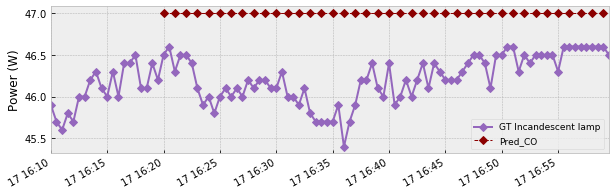

In [172]:
rcParams['figure.figsize'] = (10, 3)
fig, ax1 = plt.subplots();

#umbrales de potencia
a1=[20,1250]

gt['Incandescent lamp'][a1[0]:a1[1]].plot(ax=ax1, lw=2, c='tab:purple', marker="D")
pred_CO['Incandescent lamp'][a1[0]:a1[1]].plot(ax=ax1, c='darkred', lw=1, ls='--', marker="D")

ax1.minorticks_off()
ax1.set_ylabel('Power (W)')
ax1.legend(labels=['GT Incandescent lamp','Pred_CO'], fontsize=9, ncol=1)

err= abs(round((gt['Incandescent lamp'][a1[0]:a1[1]]-pred_CO['Incandescent lamp'][a1[0]:a1[1]])[1:6],1))

aux=40
i=0
for e in err:
    ax1.annotate((str(err[i])+'W'), xy=(aux, 140+(abs(err[i]))*0.2), xycoords='axes points', size=10)
    aux=aux+63
    i=i+1


  
#plt.savefig('./data/images/5.6_MNEAP_CO_30s.svg', bbox_inches='tight', transparent=True)
pass

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


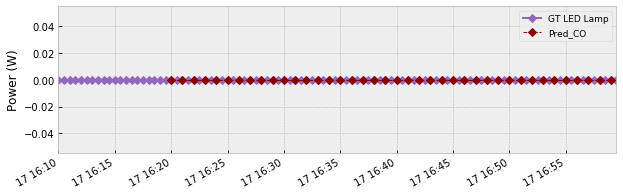

In [173]:
rcParams['figure.figsize'] = (10, 3)
fig, ax1 = plt.subplots();

#umbrales de potencia
a1=[20,1250]

gt['LED Lamp'][a1[0]:a1[1]].plot(ax=ax1, lw=2, c='tab:purple', marker="D")
pred_CO['LED Lamp'][a1[0]:a1[1]].plot(ax=ax1, c='darkred', lw=1, ls='--', marker="D")

ax1.minorticks_off()
ax1.set_ylabel('Power (W)')
ax1.legend(labels=['GT LED Lamp','Pred_CO'], fontsize=9, ncol=1)

err= abs(round((gt['LED Lamp'][a1[0]:a1[1]]-pred_CO['LED Lamp'][a1[0]:a1[1]])[1:6],1))

aux=40
i=0
for e in err:
    ax1.annotate((str(err[i])+'W'), xy=(aux, 140+(abs(err[i]))*0.2), xycoords='axes points', size=10)
    aux=aux+63
    i=i+1


 
#plt.savefig('./data/images/5.6_MNEAP_CO_30s.svg', bbox_inches='tight', transparent=True)
pass

## RMSE 

In [174]:
round(pd.DataFrame(metrics.loc['RMSE']).transpose(),1)

,Fryer,LED Lamp,Incandescent lamp,Laptop Computer,Fan
RMSE,9.0,0.0,1.5,16.0,3.8


## Resultados de todos los modelos

In [175]:
from nilmtk.metrics import fraction_energy_assigned_correctly, f1_score, error_in_assigned_energy
from nilmtk.metrics import mean_normalized_error_power, rms_error_power 
periods = {'10s':10 , '30s':30, '60s':60, '5min':60*5, '10min':60*10} #, '15min':60*15, '30min':60*30}

dir_predictions = data_dir +'NILM/Results/'
m = {}
classifiers = ['CO', 'FHMM']
methods = ['first', 'mean', 'median']
index = list(labels['Meters'][1:7])

for p_name, sp in periods.items():
    met = []
    for method in methods:
        for clf_name in classifiers:
            print('\nCalculando Metricas: '+ clf_name + '_' + p_name + '_' + method)  
           
            #Datos de Dispositivos: predicción
            input_dir = dir_predictions + clf_name + '_' + p_name + '_' + method +'_pred.h5'
            dataset = DataSet(input_dir)
            predictions=dataset.buildings[1].elec.submeters()       
            
            #Metricas
            f1 = {}; eae = {}; feac = {}; mneap = {}; rmse = {}; e=[];  
            F1 = f1_score(predictions, valid_Devices)
            f1['F1'] = F1*100
            EAE = error_in_assigned_energy(predictions, valid_Devices)
            
            for x in range(len(EAE)): e.append(EAE.iloc[x][0])
            eae['EAE'] = e
            #da error para FEAC
            #feac['FEAC'] = 100*np.ones(6)*(fraction_energy_assigned_correctly(predictions, valid_Devices))
            mneap['MNEAP'] = mean_normalized_error_power(predictions, valid_Devices)
            rmse['RMSE'] = rms_error_power(predictions, valid_Devices)
            met.append(pd.concat([pd.DataFrame(feac, index=valid_Devices.instance()),
                                  pd.DataFrame(f1),
                                  pd.DataFrame(eae, index=valid_Devices.instance()),
                                  pd.DataFrame(mneap),
                                  pd.DataFrame(rmse)],
                                 axis=1).set_index(pd.Index(index)))
            dataset.store.close()        
    m[p_name] = met

##Guardamos resultados
f = open(data_dir +'NILM/metrics.txt',"w")
f.write( str(m) )
f.close()
print('\n\nDone!')



Calculando Metricas: CO_10s_first

Calculando Metricas: FHMM_10s_first

Calculando Metricas: CO_10s_mean

Calculando Metricas: FHMM_10s_mean

Calculando Metricas: CO_10s_median

Calculando Metricas: FHMM_10s_median

Calculando Metricas: CO_30s_first

Calculando Metricas: FHMM_30s_first

Calculando Metricas: CO_30s_mean

Calculando Metricas: FHMM_30s_mean

Calculando Metricas: CO_30s_median

Calculando Metricas: FHMM_30s_median

Calculando Metricas: CO_60s_first

Calculando Metricas: FHMM_60s_first

Calculando Metricas: CO_60s_mean

Calculando Metricas: FHMM_60s_mean

Calculando Metricas: CO_60s_median

Calculando Metricas: FHMM_60s_median

Calculando Metricas: CO_5min_first

Calculando Metricas: FHMM_5min_first

Calculando Metricas: CO_5min_mean

Calculando Metricas: FHMM_5min_mean

Calculando Metricas: CO_5min_median

Calculando Metricas: FHMM_5min_median

Calculando Metricas: CO_10min_first

Calculando Metricas: FHMM_10min_first

Calculando Metricas: CO_10min_mean

Calculando Metric

In [176]:
m_mean = {}

#cols=['FEAC','F1','EAE','MNEAP','RMSE']

cols=['F1','EAE','MNEAP','RMSE']
labels=['CO-first', 'CO-mean', 'CO-median', 'FHMM-first', 'FHMM-mean' ,'FHMM-median']
per=['10s','30s','60s','5min','10min'] #,'15min','30min']

for c in cols:
    m_mean[c] = pd.DataFrame([#CO FIRST
                             [m['10s'][0][c].mean(),m['30s'][0][c].mean(),m['60s'][0][c].mean(),
                              m['5min'][0][c].mean(),m['10min'][0][c].mean()],
                            #  m['15min'][0][c].mean(),m['30min'][0][c].mean()],
                              #CO MEAN
                             [m['10s'][2][c].mean(),m['30s'][2][c].mean(),m['60s'][2][c].mean(),
                              m['5min'][2][c].mean(),m['10min'][2][c].mean()],
                              #m['15min'][2][c].mean(),m['30min'][2][c].mean()],
                              #CO MEDIAN
                             [m['10s'][4][c].mean(),m['30s'][4][c].mean(),m['60s'][4][c].mean(),
                              m['5min'][4][c].mean(),m['10min'][4][c].mean()],
                              #m['15min'][4][c].mean(),m['30min'][4][c].mean()],
                             #FHMM FIRST
                             [m['10s'][1][c].mean(),m['30s'][1][c].mean(),m['60s'][1][c].mean(),
                             m['5min'][1][c].mean(),m['10min'][1][c].mean()],
                             # m['15min'][1][c].mean(),m['30min'][1][c].mean()],
                             #FHMM MEAN            
                             [m['10s'][3][c].mean(),m['30s'][3][c].mean(),m['60s'][3][c].mean(),
                              m['5min'][3][c].mean(),m['10min'][3][c].mean()],
                              #m['15min'][3][c].mean(),m['30min'][3][c].mean()],
                             #FHMM MEDIAN
                             [m['10s'][5][c].mean(),m['30s'][5][c].mean(),m['60s'][5][c].mean(),
                              m['5min'][5][c].mean(),m['10min'][5][c].mean()]],columns=per, index=labels).transpose()
                             # m['15min'][5][c].mean(),m['30min'][5][c].mean()]],
                              
m_mean



{'F1':         CO-first    CO-mean  CO-median  FHMM-first  FHMM-mean  FHMM-median
 10s    55.026087  56.506782  55.310268   40.000000  40.000000    40.000000
 30s    60.000000  60.000000  60.000000   60.000000  60.000000    60.000000
 60s    60.000000  60.000000  60.000000   59.829060  59.829060    59.829060
 5min   60.000000  60.000000  60.000000   60.000000  60.000000    60.000000
 10min  60.000000  60.000000  60.000000   57.777778  57.777778    57.777778,
 'EAE':        CO-first  CO-mean  CO-median  FHMM-first  FHMM-mean  FHMM-median
 10s    0.007722      0.0        0.0         0.0        0.0          0.0
 30s    0.005694      0.0        0.0         0.0        0.0          0.0
 60s    0.000000      0.0        0.0         0.0        0.0          0.0
 5min   0.000408      0.0        0.0         0.0        0.0          0.0
 10min  0.000386      0.0        0.0         0.0        0.0          0.0,
 'MNEAP':        CO-first   CO-mean  CO-median  FHMM-first  FHMM-mean  FHMM-median
 10s    

In [177]:
cols=['F1','EAE','MNEAP','RMSE']

maxs=pd.concat([m_mean['F1'].transpose().max(),
                m_mean['EAE'].transpose().min(),
                m_mean['MNEAP'].transpose().min(),
                m_mean['RMSE'].transpose().min()], axis=1)
maxs.columns=cols
maxs = maxs.transpose()
round(maxs,2)

,10s,30s,60s,5min,10min
F1,56.51,60.00,60.00,60.00,60.00
EAE,0.00,0.00,0.00,0.00,0.00
MNEAP,inf,inf,inf,0.03,0.03
RMSE,10.63,6.31,6.06,0.44,0.45


In [178]:
cols=['F1','EAE','MNEAP','RMSE']

maxs_i=pd.concat([m_mean['F1'].transpose().idxmax(),
                 m_mean['EAE'].transpose().idxmin(),
                 m_mean['MNEAP'].transpose().idxmin(),
                 m_mean['RMSE'].transpose().idxmin()], axis=1)
maxs_i.columns=cols
maxs_i = maxs_i.transpose()
maxs_i

,10s,30s,60s,5min,10min
F1,CO-mean,CO-first,CO-first,CO-first,CO-first
EAE,CO-mean,CO-mean,CO-first,CO-mean,CO-mean
MNEAP,CO-first,CO-first,CO-first,CO-first,CO-first
RMSE,CO-first,FHMM-first,FHMM-first,CO-first,CO-first


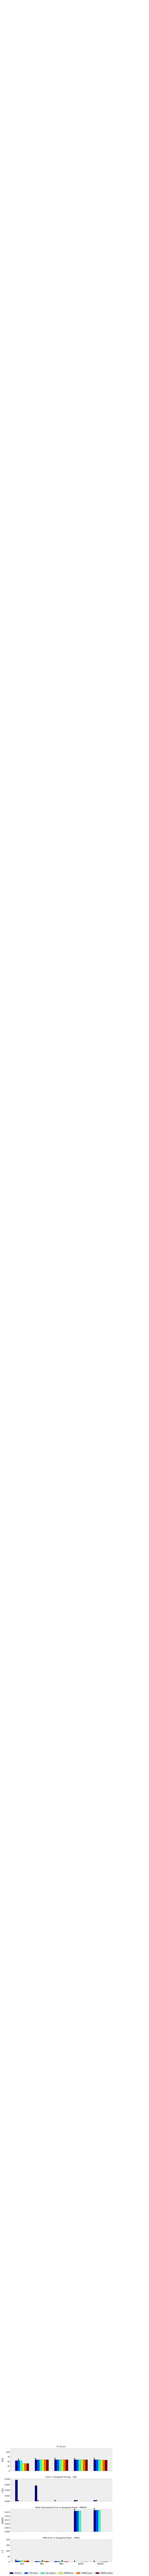

In [179]:
rcParams['figure.figsize'] = (10, 11.5)
fig, (ax2,ax3,ax4,ax5) = plt.subplots(4, 1, sharex=True, gridspec_kw={'hspace': 0.35})
cols=['F1','EAE','MNEAP','RMSE']
ylabels=['[%]','[%]','[kWh]','[-]','[W]']
per=['10s','30s','60s','5min','10min'] # ,'15min','30min']

labels={'CO-first':-0.35, 'CO-mean':-0.22, 'CO-median':-0.11, 'FHMM-first':0.01, 'FHMM-mean':0.13 ,'FHMM-median':0.245}

c=0
for ax in fig.get_axes():      
    m_mean[cols[c]].plot.bar(ax=ax, width=0.7, edgecolor='black', linewidth=0.5, legend=False, cmap="jet")
    ax.set(ylabel=ylabels[c])
    ax.grid(b=None)
    x = 0
    for p in per:
        ax.annotate("▼", xy=(labels[maxs_i[p][cols[c]]]+x, maxs[p][cols[c]]+maxs[p][cols[c]]*0.03))
        x+=1
    c+=1
    
ax5.set_xticklabels(labels=per, rotation=0, fontdict={'fontsize':12})
fig.align_ylabels([(ax2,ax3,ax4,ax5)])
ax2.set(ylim=(0,120))
ax2.set_yticks([0,25,50,75,100])

ax5.set_yticks([0,50,100,150,200])

ax2.set_title('F1-Score', fontsize=11, loc='center')
ax3.set_title('Error in Assigned Energy - EAE', fontsize=11, loc='center')
ax4.set_title('Mean Normalised Error in Assigned Power - MNEAP', fontsize=11, loc='center')
ax5.set_title('RMS Error in Assigned Power - RMSE', fontsize=11, loc='center')
lgd = ax5.legend(labels.keys(), loc='lower center', ncol=6, bbox_to_anchor=(0.5, -0.6),fontsize=9.5)


#ax2.annotate("90.5%", xy=(0.68, 98)); #30s FHMM-mean
#ax3.annotate("0.19", xy=(6.22, 1.4)); #30min FHMM-median
ax3.annotate("kWh", xy=(6.22, 0.9)); #30min FHMM-median
#ax4.annotate("0.24", xy=(6.22, 0.7)); #30min FHMM-median
#ax5.annotate("41.5", xy=(6.22, 120)); #30min FHMM-median
ax5.annotate("   W", xy=(6.22, 90)); #30min FHMM-median


plt.savefig('./data/images/5.7_All_metrics.svg', bbox_inches='tight', transparent=True)

pass

In [180]:
print('FHMM-first')
print(m['30s'][1])
print('\nFHMM-mean')
print(m['30s'][3])
print('\nFHMM-median')
print(m['30s'][5])

FHMM-first
                      F1  EAE     MNEAP       RMSE
Fryer              100.0  0.0  0.452000   9.073986
LED Lamp             0.0  0.0       NaN   0.000000
Incandescent lamp  100.0  0.0  0.022254   2.309622
Laptop Computer      0.0  0.0       inf  18.930878
Fan                100.0  0.0  0.017240   1.231645

FHMM-mean
                      F1  EAE     MNEAP       RMSE
Fryer              100.0  0.0  0.452000   9.073986
LED Lamp             0.0  0.0       NaN   0.000000
Incandescent lamp  100.0  0.0  0.022254   2.309622
Laptop Computer      0.0  0.0       inf  18.930878
Fan                100.0  0.0  0.017240   1.231645

FHMM-median
                      F1  EAE     MNEAP       RMSE
Fryer              100.0  0.0  0.452000   9.073986
LED Lamp             0.0  0.0       NaN   0.000000
Incandescent lamp  100.0  0.0  0.022254   2.309622
Laptop Computer      0.0  0.0       inf  18.930878
Fan                100.0  0.0  0.017240   1.231645


In [181]:
#resultados mejor modelo

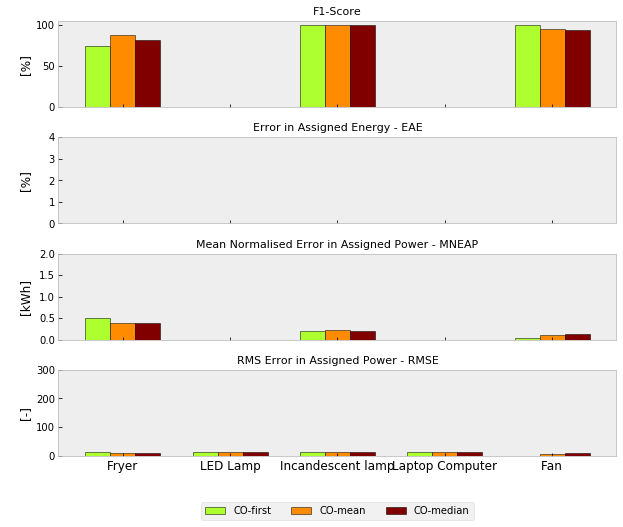

In [182]:
rcParams['figure.figsize'] = (10, 8)

fig, (ax2,ax3,ax4,ax5) = plt.subplots(4, 1, sharex=False, gridspec_kw={'hspace': 0.35})

#cols=['FEAC','F1','EAE','MNEAP','RMSE']
cols=['F1','EAE','MNEAP','RMSE']

ylabels=['[%]','[%]','[kWh]','[-]','[W]']

#labels=['FHMM-first', 'FHMM-mean' ,'FHMM-median']

labels=['CO-first', 'CO-mean' ,'CO-median']

c=0

for ax in fig.get_axes():
    #FHMM
  #  df=pd.DataFrame([m['30s'][1][cols[c]],m['30s'][3][cols[c]],m['30s'][5][cols[c]]]).transpose()
    #CO
    df=pd.DataFrame([m['10s'][0][cols[c]],m['10s'][2][cols[c]],m['10s'][4][cols[c]]]).transpose()
  
    #if ax==ax1:
    #    df['FEAC'].mean().plot.barh(ax=ax1, width=0.7, edgecolor='black', linewidth=0.5, legend=False,   color=['greenyellow','darkorange','maroon'])
    #else:
    #     df.plot.bar(ax=ax, width=0.7, edgecolor='black', linewidth=0.5, legend=False,   color=['greenyellow','darkorange','maroon'])
 
    df.plot.bar(ax=ax, width=0.7, edgecolor='black', linewidth=0.5, legend=False,   color=['greenyellow','darkorange','maroon'])
    ax.set(ylabel=ylabels[c])
    ax.grid(b=None)
    c+=1   
    

ax2.set_xticklabels('')
ax3.set_xticklabels('')
ax4.set_xticklabels('')
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=0, fontdict={'fontsize':12})
fig.align_ylabels([(ax1,ax2,ax3,ax4,ax5)])
ax3.set_yticks([0,1,2,3,4])
ax4.set(ylim=(0,1.8))
ax4.set_yticks([0,0.5,1,1.5,2])
ax5.set(ylim=(0,270))
ax5.set_yticks([0,100,200,300])
ax2.set_title('F1-Score', fontsize=11, loc='center')
ax3.set_title('Error in Assigned Energy - EAE', fontsize=11, loc='center')
ax4.set_title('Mean Normalised Error in Assigned Power - MNEAP', fontsize=11, loc='center')
ax5.set_title('RMS Error in Assigned Power - RMSE', fontsize=11, loc='center')
lgd = ax5.legend(labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.8))


plt.savefig('./data/images/5.8_All_metrics_2.svg', bbox_inches='tight', transparent=True)

pass

KeyError: '10seg'

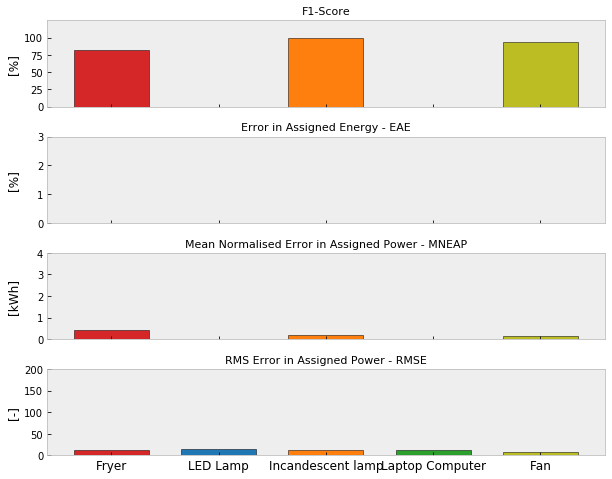

In [183]:
rcParams['figure.figsize'] = (10, 8)

fig, (ax2,ax3,ax4,ax5) = plt.subplots(4, 1, sharex=False, gridspec_kw={'hspace': 0.35})
#cols=['FEAC','F1','EAE','MNEAP','RMSE']

cols=['F1','EAE','MNEAP','RMSE']

ylabels=['[%]','[%]','[kWh]','[-]','[W]']
colors=['tab:red','tab:blue','tab:orange','tab:green','tab:olive','tab:purple','tab:cyan']
c=0

for ax in fig.get_axes():
    df=pd.DataFrame(m['10s'][4][cols[c]])
    df[cols[c]].plot.bar(ax=ax, width=0.7, edgecolor='black', linewidth=0.5, legend=False, color=colors)
    ax.set(ylabel=ylabels[c])
    ax.grid(b=None)
    c+=1


ax2.set_xticklabels('')
ax3.set_xticklabels('')
ax4.set_xticklabels('')
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=0, fontdict={'fontsize':12})

fig.align_ylabels([(ax2,ax3,ax4,ax5)])

ax2.set(ylim=(0,125))
ax3.set(ylim=(0,1))
ax4.set(ylim=(0,0.7))
ax5.set(ylim=(0,110))

ax2.set_yticks([0,25,50,75,100])
ax3.set_yticks([0,1,2,3])
ax4.set_yticks([0,1,2,3,4])
ax5.set_yticks([0,50,100,150,200])


ax2.set_title('F1-Score', fontsize=11, loc='center')
ax3.set_title('Error in Assigned Energy - EAE', fontsize=11, loc='center')
ax4.set_title('Mean Normalised Error in Assigned Power - MNEAP', fontsize=11, loc='center')
ax5.set_title('RMS Error in Assigned Power - RMSE', fontsize=11, loc='center')

df=pd.DataFrame(m['10seg'][5])

for x in range(5):ax2.annotate(str(round(df['F1'][x],1))+'%', xy=(x-0.18 , df['F1'][x]+4),fontsize=9.5)
for x in range(5):ax3.annotate(str(round(df['EAE'][x],1))+' kWh', xy=(x-0.25 , df['EAE'][x]+0.1),fontsize=9.5)
for x in range(5):ax4.annotate(str(round(df['MNEAP'][x],1)), xy=(x-0.08 , df['MNEAP'][x]+0.03),fontsize=9.5)
for x in range(5):ax5.annotate(str(round(df['RMSE'][x]))+' W', xy=(x-0.18 , df['RMSE'][x]+5),fontsize=9.5)

#plt.savefig('./data/images/5.9_Metrics_FHMM_30min_median.svg', bbox_inches='tight', transparent=True)

In [ ]:
valid_Devices.total_energy()

In [ ]:
valid_Devices.energy_per_meter()

In [ ]:
### Replicando el entrenamiento del modelo

In [ ]:
from nilmtk import DataSet
from nilmtk.legacy.disaggregate import CombinatorialOptimisation

train = DataSet('ualm2.h5')



#train.set_window(start="2023-05-03 11:48:08", end="2023-05-03 16:23:57")


train_elec=train.buildings[1].elec 

#dispositivos a entrenar: [Lights_1, Lights_2, HVAC_1, HVAC_2, HVAC_4, Rack]
train_Devices=train_elec.select(instance=[2,3,4,5,6])

#opcional: asignación manual de estados de dispositivos
num_states={train_Devices[2]:2, train_Devices[3]:3, train_Devices[4]:4,
            train_Devices[5]:5, train_Devices[6]:6}

#entrenamiento y exportación del modelo
CO_60s_median=CombinatorialOptimisation()
CO_60s_median.MIN_CHUNK_LENGTH=1
CO_60s_median.train(train_Devices,
                        num_states_dict={}, #en otro caso: { }
                        ac_type='active',
                        sample_period=1800,
                        resample_kwargs={'how':'median'})




print('\n\nDone!')


In [ ]:
CO_10s_median.model